# START

In [1]:
import logging
import sys
import numpy as np 
import pandas as pd
from pandas import to_datetime
import os
import glob
import matplotlib.pyplot as plt
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logger = logging.getLogger('LOGGER_NAME')
logger.info('Start CambiumAnomalyClassificator')

INFO:LOGGER_NAME:Start CambiumAnomalyClassificator


# Load data from Cambium CPEs reports in a single file

In [2]:

def get_concat_csv(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], axis=0).reset_index()

path = './dataset cambium/'

fmask = os.path.join(path, '*.csv')
print(fmask)
list_of_files=glob.glob(fmask)
print(list_of_files)
Data_Cambium = get_concat_csv(glob.glob(fmask),sep = ',', encoding='utf-8')

print(Data_Cambium.shape)
print(Data_Cambium.info())
print(Data_Cambium)

logger.info("Saving a single Dataset")
Data_Cambium.to_csv('./Single_Dataset_Cambium.csv', encoding='utf-8')


./dataset cambium/*.csv
['./dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201225T000000-21d21a70-4644-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201226T000000-4c239780-470d-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201227T000000-76cfb7b0-47d6-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201228T000000-a11e2780-489f-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201229T000000-cb83efe0-4968-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-system-daily-20201230T000000-f5f57810-4a31-11eb-abb7-d137dbf3e514.csv', './dataset cambium\\cnMaestro-cnmaestro_on_premises-performance-24Hours-ePMP-syst

# Loading dataset 

Features are: Polling Timestamp,MAC,Device Name, Device Type, Device Mode, Downlink MCS, Uplink MCS, Downlink ThroughPut (Kbps), Uplink ThroughPut (Kbps), Downlink Retransmission Pkts (%),
Uplink Retransmission Pkts (%), CPUs, Session Drops, Downlink SNR (dB), Uplink SNR (dB),
Downlink Usage (Packets), Uplink Usage (Packets), Downlink RSSI (dBm), Uplink RSSI (dBm),
Offline Count, Status, Status Duration.

In [3]:
data = './Single_Dataset_Cambium.csv'
colX = ['Polling Timestamp', 'MAC', 'Device Name', 'Device Type', 'Device Mode',
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'Status Duration']

X_data_cambium = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8') 
print(X_data_cambium.info())
print(X_data_cambium.shape)
print(X_data_cambium)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60573 entries, 0 to 60572
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 60573 non-null  object 
 1   MAC                               60573 non-null  object 
 2   Device Name                       60573 non-null  object 
 3   Device Type                       60573 non-null  object 
 4   Device Mode                       60573 non-null  object 
 5   Downlink MCS                      60573 non-null  object 
 6   Uplink MCS                        60573 non-null  object 
 7   Downlink ThroughPut (Kbps)        60573 non-null  float64
 8   Uplink ThroughPut (Kbps)          60573 non-null  float64
 9   Downlink Retransmission Pkts (%)  60573 non-null  float64
 10  Uplink Retransmission Pkts (%)    60573 non-null  float64
 11  CPUs                              60573 non-null  float64
 12  Sess

# Selecting records with "Device Mode" = "SM".

In [4]:
print ('Dataset before dropping records:\n', X_data_cambium.shape)
print(X_data_cambium ['Device Mode'].value_counts())
X_data_cambium = X_data_cambium.drop(X_data_cambium.loc[(X_data_cambium['Device Mode'] != 'SM')].index)
print ('Dataset after dropping records:\n', X_data_cambium.shape)
print(X_data_cambium ['Device Mode'].value_counts())

Dataset before dropping records:
 (60573, 22)
SM    57302
AP     3271
Name: Device Mode, dtype: int64
Dataset after dropping records:
 (57302, 22)
SM    57302
Name: Device Mode, dtype: int64


In [5]:
# Status Duration: calculating amount of minutes

print(X_data_cambium.info())

MStatusDuration = []
for row in X_data_cambium['Status Duration']:
    #print(row)
    temp = (str(row)).split()
    #print(temp)
    d = ((temp[0].split('d'))[0])
    h = (temp[1].split('h'))[0]
    m = (temp[2].split('m'))[0]
    #print(int(d)*24*60+int(h)*60+int(m))
    MStatusDuration.append(int(d)*24*60+int(h)*60+int(m))
X_data_cambium['MStatus Duration'] = MStatusDuration
# elimina caratteristica origine
X_data_cambium.drop(columns=['Status Duration'],inplace=True)
print (X_data_cambium)

print(X_data_cambium.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57302 entries, 0 to 60572
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 57302 non-null  object 
 1   MAC                               57302 non-null  object 
 2   Device Name                       57302 non-null  object 
 3   Device Type                       57302 non-null  object 
 4   Device Mode                       57302 non-null  object 
 5   Downlink MCS                      57302 non-null  object 
 6   Uplink MCS                        57302 non-null  object 
 7   Downlink ThroughPut (Kbps)        57302 non-null  float64
 8   Uplink ThroughPut (Kbps)          57302 non-null  float64
 9   Downlink Retransmission Pkts (%)  57302 non-null  float64
 10  Uplink Retransmission Pkts (%)    57302 non-null  float64
 11  CPUs                              57302 non-null  float64
 12  Sess

# Selecting records where "Status" = "Online" or  ("Status" = "Offline" and MStatus Duration < 10gg)

In [6]:
print ('Dataset before dropping records:\n', X_data_cambium.shape)
print(X_data_cambium ['Status'].value_counts())
X_data_cambium = X_data_cambium.drop(X_data_cambium.loc[(X_data_cambium['Status'] == 'Offline') & (X_data_cambium['MStatus Duration'] > 14400)].index)
print ('Dataset after dropping records:\n', X_data_cambium.shape)
print(X_data_cambium ['Status'].value_counts())


Dataset before dropping records:
 (57302, 22)
Online     40418
Offline    16884
Name: Status, dtype: int64
Dataset after dropping records:
 (41977, 22)
Online     40418
Offline     1559
Name: Status, dtype: int64


# Saving Dataset 

In [7]:
logger.info("Saving Dataset")
X_data_cambium.to_csv('./X_Data_Cambium.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset


In [8]:
logger.info("Printing NaN values:")
print(X_data_cambium.isnull().sum().sum())
if (X_data_cambium.isnull().sum().sum()>0):    
    print(X_data_cambium.isnull().sum())

INFO:LOGGER_NAME:Printing NaN values:
0


# Load file with support requests

In [9]:
data = './ticket/ticket_split.csv'
colX = ['Cliente','DataTime']
X_data_ticket = pd.read_csv(data, sep = ';', usecols= colX, encoding='utf-8') 
print(X_data_ticket.info())
print(X_data_ticket.shape)
print(X_data_ticket)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cliente   1705 non-null   object
 1   DataTime  1705 non-null   object
dtypes: object(2)
memory usage: 26.8+ KB
None
(1705, 2)
               Cliente                   DataTime
0        ABBATE ANGELO  2020-09-14 11:49:02+02:00
1        ABBATE ANGELO  2020-11-27 10:47:23+01:00
2      ABBATE PASQUALE  2020-11-10 15:30:36+01:00
3        ADZOVIC FEHIM  2020-07-10 09:07:44+02:00
4        ADZOVIC FEHIM  2020-08-03 09:48:26+02:00
...                ...                        ...
1700      ZARA NEMESIO  2019-06-17 09:16:17+02:00
1701      ZARA NEMESIO  2020-09-25 10:14:45+02:00
1702      ZARA NEMESIO  2020-12-01 09:43:54+01:00
1703      ZARA NEMESIO  2021-03-01 09:27:56+01:00
1704        ZINI MARIA  2020-11-23 11:41:11+01:00

[1705 rows x 2 columns]


In [10]:
print('Printing Polling Timestamp Min,Max Data Cambium:',X_data_cambium['Polling Timestamp'].values.min(),X_data_cambium['Polling Timestamp'].values.max())
print('Printing DataTime Min,Max Data Ticket:',X_data_ticket['DataTime'].values.min(),X_data_ticket['DataTime'].values.max())

Printing Polling Timestamp Min,Max Data Cambium: 2020-12-24 01:00:00 2021-03-22 01:00:00
Printing DataTime Min,Max Data Ticket: 2019-02-19 11:30:26+01:00 2021-03-23 09:12:09+01:00


In [11]:
print(X_data_ticket ['Cliente'].value_counts())
X_data_ticket ['Cliente'] = X_data_ticket ['Cliente'].str.strip()
X_data_ticket ['Cliente'] = X_data_ticket ['Cliente'].str.upper()
print(X_data_ticket ['Cliente'].value_counts())

logger.info("Get only Data from X_data_ticket")
X_data_ticket['DataTime'] = to_datetime(X_data_ticket['DataTime'],dayfirst = True, utc=True)
X_data_ticket['DataTime'] = X_data_ticket['DataTime'].dt.date
X_data_ticket.sort_values(by=['DataTime'], ascending = 1, inplace = True)
print(X_data_ticket)

print(X_data_cambium ['Device Name'].value_counts())
X_data_cambium ['Device Name'] = X_data_cambium ['Device Name'].str.strip()
X_data_cambium ['Device Name'] = X_data_cambium ['Device Name'].str.upper()
print(X_data_cambium ['Device Name'].value_counts())

logger.info("Get only Data from X_data_cambium")
X_data_cambium['Polling Timestamp'] = to_datetime(X_data_cambium['Polling Timestamp'],dayfirst = True, utc=True)
X_data_cambium['Polling Timestamp'] = X_data_cambium['Polling Timestamp'].dt.date
X_data_cambium.sort_values(by=['Polling Timestamp'], ascending = 1, inplace = True)
print(X_data_cambium)

 D'ANGIOLELLA PATRIZIO NOTAIO STUDIO AVERSA    14
 ESPOSITO GENNARO                              14
 CROCIANI MARIA                                12
 GIOVISI SRL                                   11
 GRAZIANO & CO. SRL                            10
                                               ..
 PISCITELLI ANTONIO                             1
 ABBATE PASQUALE                                1
 TESTA GENNARO                                  1
 PUOCCI DONATO                                  1
 DE NICOLA MARIO                                1
Name: Cliente, Length: 700, dtype: int64
D'ANGIOLELLA PATRIZIO NOTAIO STUDIO AVERSA    14
ESPOSITO GENNARO                              14
CROCIANI MARIA                                12
GIOVISI SRL                                   11
GRAZIANO & CO. SRL                            10
                                              ..
CATERINO PATRIZIA                              1
BIANCO ANTONIETTA                              1
APA BARBARA      

# Dropping records where X_data_ticket DataTime < minimum of Polling Timestamp

In [12]:
X_data_ticket = X_data_ticket[X_data_ticket['DataTime'] >= pd.to_datetime(X_data_cambium['Polling Timestamp'].values.min(),dayfirst = True, utc=True)]
print(X_data_ticket.shape)
logger.info("Saving Dataset... Ticket")
X_data_ticket.to_csv('./X_data_ticket.csv', encoding='utf-8')

(511, 2)
INFO:LOGGER_NAME:Saving Dataset... Ticket


# Merging CPEs status and issues datasets

In [13]:
print("Dataset X_data_cambium:",X_data_cambium.shape)
print("Dataset X_data_ticket:",X_data_ticket.shape)
XY_data = pd.merge(X_data_cambium,X_data_ticket,left_on=['Device Name','Polling Timestamp'],right_on=['Cliente','DataTime'],how='left')
print ("Dataset XY_data:", XY_data.shape)

Dataset X_data_cambium: (41977, 22)
Dataset X_data_ticket: (511, 2)
Dataset XY_data: (41977, 24)


In [14]:
print ("Dataset XY_data:", XY_data.info())
print ("Dataset XY_data:", XY_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41977 entries, 0 to 41976
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 41977 non-null  object 
 1   MAC                               41977 non-null  object 
 2   Device Name                       41977 non-null  object 
 3   Device Type                       41977 non-null  object 
 4   Device Mode                       41977 non-null  object 
 5   Downlink MCS                      41977 non-null  object 
 6   Uplink MCS                        41977 non-null  object 
 7   Downlink ThroughPut (Kbps)        41977 non-null  float64
 8   Uplink ThroughPut (Kbps)          41977 non-null  float64
 9   Downlink Retransmission Pkts (%)  41977 non-null  float64
 10  Uplink Retransmission Pkts (%)    41977 non-null  float64
 11  CPUs                              41977 non-null  float64
 12  Sess

In [15]:
XY_data.to_csv('./XY_data.csv', encoding='utf-8')

# Load file with closed requests

In [16]:
data = './ticket/ticket chiusi split.csv'
colX = ['Cliente Ticket Chiuso','DataTime Ticket Chiuso']
X_data_ticket_closed = pd.read_csv(data, sep = ';', usecols= colX, encoding='utf-8') 
print(X_data_ticket_closed.info())
print(X_data_ticket_closed.shape)
print(X_data_ticket_closed)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cliente Ticket Chiuso   427 non-null    object
 1   DataTime Ticket Chiuso  427 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB
None
(427, 2)
    Cliente Ticket Chiuso     DataTime Ticket Chiuso
0           ADZOVIC FEHIM  2021-03-24 11:52:37+01:00
1           ADZOVIC FEHIM  2021-01-29 12:53:54+01:00
2           ADZOVIC FEHIM  2021-03-23 12:33:48+01:00
3            AGOSTI MARIO  2021-01-20 09:43:35+01:00
4             ALETOR JOAN  2021-01-12 09:42:33+01:00
..                    ...                        ...
422   VILLA DEI CEDRI SRL  2021-02-11 16:43:24+01:00
423        XHELAJ BLERINA  2021-01-18 15:08:24+01:00
424      ZAGARIA RAFFAELE  2021-03-17 09:45:01+01:00
425        ZAMPELLA LUIGI  2021-03-03 09:35:12+01:00
426          ZARA NEMESIO  2021-03-01 11:59:44+01:0

In [17]:
print(X_data_ticket_closed ['Cliente Ticket Chiuso'].value_counts())
X_data_ticket_closed ['Cliente Ticket Chiuso'] = X_data_ticket_closed ['Cliente Ticket Chiuso'].str.strip()
X_data_ticket_closed ['Cliente Ticket Chiuso'] = X_data_ticket_closed ['Cliente Ticket Chiuso'].str.upper()
print(X_data_ticket_closed ['Cliente Ticket Chiuso'].value_counts())

logger.info("Get only Data from X_data_ticket_closed")
X_data_ticket_closed['DataTime Ticket Chiuso'] = to_datetime(X_data_ticket_closed['DataTime Ticket Chiuso'],dayfirst = True, utc=True)
X_data_ticket_closed['DataTime Ticket Chiuso'] = X_data_ticket_closed['DataTime Ticket Chiuso'].dt.date
X_data_ticket_closed.sort_values(by=['DataTime Ticket Chiuso'], ascending = 1, inplace = True)
print(X_data_ticket_closed.info())

TROTTA DOMENICO            5
RAN SRL                    5
ESPOSITO GENNARO           5
RONZA LIVIA                4
MASSA GIOVANNI UTENZA 2    4
                          ..
DE FALCO SILVIA            1
BASCO ERRICO               1
DON MASSIMO MORMILE        1
CORVINO EDUARDO            1
RICCARDI GENNARO           1
Name: Cliente Ticket Chiuso, Length: 293, dtype: int64
TROTTA DOMENICO                         5
RAN SRL                                 5
ESPOSITO GENNARO                        5
LOMBARDI FELICE                         4
GIOVISI SRL                             4
                                       ..
L'ANTICO FOCOLARE DI T. MAZZUCCO SAS    1
NATALE MARIA                            1
CAIAZZA ROSA                            1
BURRONE SANTO                           1
CEPARANO  DANIELE                       1
Name: Cliente Ticket Chiuso, Length: 291, dtype: int64
INFO:LOGGER_NAME:Get only Data from X_data_ticket_closed
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42

In [18]:
print('Printing Polling Timestamp Min,Max Data Cambium:',X_data_cambium['Polling Timestamp'].values.min(),X_data_cambium['Polling Timestamp'].values.max())
print('Printing DataTime Min,Max Ticket Chiuso:',X_data_ticket_closed['DataTime Ticket Chiuso'].values.min(),X_data_ticket_closed['DataTime Ticket Chiuso'].values.max())

Printing Polling Timestamp Min,Max Data Cambium: 2020-12-24 2021-03-22
Printing DataTime Min,Max Ticket Chiuso: 2020-12-24 2021-03-24


# Dropping records where X_data_ticket_closed DataTime < minimum of Polling Timestamp

In [19]:
X_data_ticket_closed = X_data_ticket_closed[X_data_ticket_closed['DataTime Ticket Chiuso'] >= pd.to_datetime(X_data_cambium['Polling Timestamp'].values.min(),dayfirst = True, utc=True)]
print(X_data_ticket_closed.shape)
logger.info("Saving Dataset... Ticket")
X_data_ticket_closed.to_csv('./X_data_ticket_closed.csv', encoding='utf-8')

(427, 2)
INFO:LOGGER_NAME:Saving Dataset... Ticket


# Merging CPEs status and issues datasets

In [20]:
print("Dataset XY_data:",XY_data.shape)
print("Dataset X_data_ticket_closed:",X_data_ticket_closed.shape)
XY_data = pd.merge(XY_data,X_data_ticket_closed,left_on=['Device Name','Polling Timestamp'],right_on=['Cliente Ticket Chiuso','DataTime Ticket Chiuso'],how='left')
print ("Dataset XY_data:", XY_data.shape)
XY_data.to_csv('./XY_data.csv', encoding='utf-8')

Dataset XY_data: (41977, 24)
Dataset X_data_ticket_closed: (427, 2)
Dataset XY_data: (41977, 26)


# Adding "Ticket" label   

In [21]:
XY_data['Ticket'] = np.NaN
print(XY_data.shape)

print('Records with no Ticket:',XY_data['DataTime'].isnull().sum())
print('Records with Ticket:',XY_data['DataTime'].notnull().sum())

XY_data.loc[XY_data['DataTime'].isnull(),['Ticket']]  = '0'
XY_data.loc[XY_data['DataTime'].notnull(),['Ticket']] = '1'

print(XY_data.groupby('Ticket').size())

(41977, 27)
Records with no Ticket: 41758
Records with Ticket: 219
Ticket
0    41758
1      219
dtype: int64


In [22]:
'''
# Set ticket = 2 for each customer all the samples between the opening date and the closing date of the ticket
import time

XY_data = XY_data.sort_values(by=['Device Name','Polling Timestamp'])
print(XY_data.info())

#XY_data.set_index(['Device Name'], drop = False)

XY_data_1 = XY_data.loc[(XY_data['Ticket'] == '1'),['Device Name','Polling Timestamp','DataTime']].sort_values(by=['Device Name','Polling Timestamp'])
ind = XY_data_1.index
number_of_rows = len(ind)

i = 0
for index1,row1 in XY_data_1.iterrows():
    print('Device Name: ', str(index1)+'_'+str(time.time()))
    print(i , str('di ')+str(number_of_rows))
    for index, row in XY_data.iterrows():
        if((row['Device Name']==XY_data_1.loc[index1]['Device Name'])):                
                if((to_datetime(row['DataTime']) == to_datetime(XY_data_1.loc[index1]['DataTime']))
                   & (pd.notna(row['DataTime Ticket Chiuso']))):
                    #print('break')
                    #print(row['DataTime Ticket Chiuso'])
                    #print('break', time.time())
                    break            
                elif((row['Polling Timestamp'] > XY_data_1.loc[index1]['DataTime']) & (pd.isna(row['DataTime Ticket Chiuso']))):
                    XY_data.loc[index,['Ticket']]  = '2'
                    #print(index)
                    #print('index', time.time())
                elif((row['Polling Timestamp'] > XY_data_1.loc[index1]['DataTime']) 
                     & (pd.notna(row['DataTime Ticket Chiuso']))):
                    XY_data.loc[index,['Ticket']]  = '2'
                    #print('break1')
                    #print('break1', time.time())
                    break
    i = i+1
'''

"\n# Set ticket = 2 for each customer all the samples between the opening date and the closing date of the ticket\nimport time\n\nXY_data = XY_data.sort_values(by=['Device Name','Polling Timestamp'])\nprint(XY_data.info())\n\n#XY_data.set_index(['Device Name'], drop = False)\n\nXY_data_1 = XY_data.loc[(XY_data['Ticket'] == '1'),['Device Name','Polling Timestamp','DataTime']].sort_values(by=['Device Name','Polling Timestamp'])\nind = XY_data_1.index\nnumber_of_rows = len(ind)\n\ni = 0\nfor index1,row1 in XY_data_1.iterrows():\n    print('Device Name: ', str(index1)+'_'+str(time.time()))\n    print(i , str('di ')+str(number_of_rows))\n    for index, row in XY_data.iterrows():\n        if((row['Device Name']==XY_data_1.loc[index1]['Device Name'])):                \n                if((to_datetime(row['DataTime']) == to_datetime(XY_data_1.loc[index1]['DataTime']))\n                   & (pd.notna(row['DataTime Ticket Chiuso']))):\n                    #print('break')\n                    #pr

In [23]:
# Set ticket = 2 for each customer all the samples between the opening date and the closing date of the ticket
import time

XY_data = XY_data.sort_values(by=['Device Name','Polling Timestamp'])
print(XY_data.info())

XY_data.set_index(['Device Name'], drop = False)

XY_data_1 = XY_data.loc[(XY_data['Ticket'] == '1'),['Device Name','Polling Timestamp','DataTime']].sort_values(by=['Device Name','Polling Timestamp'])
ind = XY_data_1.index
number_of_rows = len(ind)
i = 1

for index1,row1 in XY_data_1.iterrows():
    XY_data_temp = XY_data[XY_data['Device Name']==XY_data_1.loc[index1]['Device Name']]
    print(str(i), str('di ')+str(number_of_rows)+' Device Name: ', str(XY_data_1.loc[index1]['Device Name'])+'_'+str(time.time()))
    for index, row in XY_data_temp.iterrows():
        if((row['Device Name']==XY_data_1.loc[index1]['Device Name'])):                
                if((to_datetime(row['DataTime']) == to_datetime(XY_data_1.loc[index1]['DataTime']))
                   & (pd.notna(row['DataTime Ticket Chiuso']))):
                    #print('break')
                    #print(row['DataTime Ticket Chiuso'])
                    #print('break', time.time())
                    break            
                elif((row['Polling Timestamp'] > XY_data_1.loc[index1]['DataTime']) & (pd.isna(row['DataTime Ticket Chiuso']))):
                    XY_data.loc[index,['Ticket']]  = '2'
                    #print(index)
                    #print('index', time.time())
                elif((row['Polling Timestamp'] > XY_data_1.loc[index1]['DataTime']) 
                     & (pd.notna(row['DataTime Ticket Chiuso']))):
                    XY_data.loc[index,['Ticket']]  = '2'
                    #print('break1')
                    #print('break1', time.time())
                    break
    i = i+1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41977 entries, 117 to 41850
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 41977 non-null  object 
 1   MAC                               41977 non-null  object 
 2   Device Name                       41977 non-null  object 
 3   Device Type                       41977 non-null  object 
 4   Device Mode                       41977 non-null  object 
 5   Downlink MCS                      41977 non-null  object 
 6   Uplink MCS                        41977 non-null  object 
 7   Downlink ThroughPut (Kbps)        41977 non-null  float64
 8   Uplink ThroughPut (Kbps)          41977 non-null  float64
 9   Downlink Retransmission Pkts (%)  41977 non-null  float64
 10  Uplink Retransmission Pkts (%)    41977 non-null  float64
 11  CPUs                              41977 non-null  float64
 12  Se

In [24]:
XY_data.to_csv('./XY_data.csv', encoding='utf-8')

# Load Customer file

In [25]:
data = './clienti/clienti_(1).csv'
colX = ['COD. CLIENTE','NOME CLIENTE','CLIENTE ATTIVO','COMUNE INSTALLAZIONE','DIFFUSIONE']

X_data_cliente = pd.read_csv(data, sep = ';', usecols= colX, encoding='utf-8') 
print(X_data_cliente.info())
print(X_data_cliente.shape)
print(X_data_cliente)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COD. CLIENTE          2067 non-null   object
 1   NOME CLIENTE          2067 non-null   object
 2   CLIENTE ATTIVO        2067 non-null   object
 3   COMUNE INSTALLAZIONE  2067 non-null   object
 4   DIFFUSIONE            1731 non-null   object
dtypes: object(5)
memory usage: 80.9+ KB
None
(2067, 5)
     COD. CLIENTE                       NOME CLIENTE CLIENTE ATTIVO  \
0            Fly1                    CSA s.c.a. r.l.             NO   
1            Fly2  STUDIO COMMERCIALE PALMIERO LUIGI             NO   
2            Fly3                   ALCAS ITALIA SRL             NO   
3            Fly4                   STAR ENERGIA SRL             SI   
4            Fly5                    BRICO APPIA SRL             NO   
...           ...                                ...          

# Delete records where 'NOME CLIENTE' occurrence > 2

In [26]:
print(X_data_cliente.info())
X_data_cliente = X_data_cliente.groupby('NOME CLIENTE')   # group by
X_data_cliente = (X_data_cliente.filter(lambda x: len(x) < 2))  #  HAVING COUNT(*) < 2
print(X_data_cliente.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COD. CLIENTE          2067 non-null   object
 1   NOME CLIENTE          2067 non-null   object
 2   CLIENTE ATTIVO        2067 non-null   object
 3   COMUNE INSTALLAZIONE  2067 non-null   object
 4   DIFFUSIONE            1731 non-null   object
dtypes: object(5)
memory usage: 80.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 2066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COD. CLIENTE          1946 non-null   object
 1   NOME CLIENTE          1946 non-null   object
 2   CLIENTE ATTIVO        1946 non-null   object
 3   COMUNE INSTALLAZIONE  1946 non-null   object
 4   DIFFUSIONE            1624 non-null   object
dtypes: object(5)
memory usage: 91.2+ KB
N

# More datasets merging (XY_data with X_data_cliente) 

In [27]:
print("Dataset XY_data:",XY_data.shape)
print("Dataset X_data_cliente:",X_data_cliente.shape)

#print(X_data_cliente ['NOME CLIENTE'].value_counts())
X_data_cliente ['NOME CLIENTE'] = X_data_cliente ['NOME CLIENTE'].str.strip()
X_data_cliente ['NOME CLIENTE'] = X_data_cliente ['NOME CLIENTE'].str.upper()
#print(X_data_cliente ['NOME CLIENTE'].value_counts())

XY_data_ctc_all = pd.merge(XY_data,X_data_cliente,left_on=XY_data['Device Name'].str.upper(),right_on=X_data_cliente['NOME CLIENTE'].str.upper(),how='left')

print ("Dataset XY_data_ctc_all:", XY_data_ctc_all.shape)

Dataset XY_data: (41977, 27)
Dataset X_data_cliente: (1946, 5)
Dataset XY_data_ctc_all: (41977, 33)


# Save Dataset 

In [28]:
logger.info("Saving Dataset...XY_data_ctc_all")
XY_data_ctc_all.to_csv('./XY_data_ctc_all.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc_all


# Load Dataset from previous saving 

Features are: Polling Timestamp,MAC,Device Name, Device Type, Device Mode, Downlink MCS, Uplink MCS, Downlink ThroughPut (Kbps), Uplink ThroughPut (Kbps), Downlink Retransmission Pkts (%),
Uplink Retransmission Pkts (%), CPUs, Session Drops, Downlink SNR (dB), Uplink SNR (dB),
Downlink Usage (Packets), Uplink Usage (Packets), Downlink RSSI (dBm), Uplink RSSI (dBm),
Offline Count, Status, Status Duration, COD. CLIENTE, COMUNE INSTALLAZIONE, DIFFUSIONE

In [29]:
data = './XY_data_ctc_all.csv'
colX = ['Polling Timestamp', 'MAC', 'Device Name', 'Device Type', 'Device Mode',
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','COD. CLIENTE','COMUNE INSTALLAZIONE','DIFFUSIONE', 'CLIENTE ATTIVO', 'Ticket']
dtypes = {'COMUNE INSTALLAZIONE':'str' }

XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8', dtype=dtypes) 
print(XY_data_ctc.info())
print(XY_data_ctc.shape)
print(XY_data_ctc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41977 entries, 0 to 41976
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 41977 non-null  object 
 1   MAC                               41977 non-null  object 
 2   Device Name                       41977 non-null  object 
 3   Device Type                       41977 non-null  object 
 4   Device Mode                       41977 non-null  object 
 5   Downlink MCS                      41977 non-null  object 
 6   Uplink MCS                        41977 non-null  object 
 7   Downlink ThroughPut (Kbps)        41977 non-null  float64
 8   Uplink ThroughPut (Kbps)          41977 non-null  float64
 9   Downlink Retransmission Pkts (%)  41977 non-null  float64
 10  Uplink Retransmission Pkts (%)    41977 non-null  float64
 11  CPUs                              41977 non-null  float64
 12  Sess

# Saving Dataset 

In [30]:
logger.info("Saving Dataset...XY_data_ctc")
XY_data_ctc.to_csv('./XY_data_ctc_GVM.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc


# Pre-elaborazione
## rimozione e imputazione dei valori mancanti
## gestione dati ordinali
## gestione dati nominali
## codifica delle etichette delle classi
## dataset di addestramento e dataset di test
## riduzione in scala e normalizzazione
## selezione delle caratteristiche appropriate 

# Gestione Valori Mancanti (GVM)

In [31]:
# Print the number of null (missing) values for each column
print(XY_data_ctc.isnull().sum())
# Print the occurrence of null values (true if data is missing)
print(XY_data_ctc.isnull())

Polling Timestamp                       0
MAC                                     0
Device Name                             0
Device Type                             0
Device Mode                             0
Downlink MCS                            0
Uplink MCS                              0
Downlink ThroughPut (Kbps)              0
Uplink ThroughPut (Kbps)                0
Downlink Retransmission Pkts (%)        0
Uplink Retransmission Pkts (%)          0
CPUs                                    0
Session Drops                           0
Downlink SNR (dB)                       0
Uplink SNR (dB)                         0
Downlink Usage (Packets)                0
Uplink Usage (Packets)                  0
Downlink RSSI (dBm)                     0
Uplink RSSI (dBm)                       0
Offline Count                           0
Status                                  0
MStatus Duration                        0
Ticket                                  0
COD. CLIENTE                      

In [32]:
# I check how many samples of the feature COD. CLIENTE are null
print('No. of samples with COD. CLIENTE not completed:',XY_data_ctc['COD. CLIENTE'].isnull().sum())
print((XY_data_ctc[XY_data_ctc['COD. CLIENTE'].isnull()]).groupby(['Device Name']).size())
# Drop only the lines where COD. CLIENTE is null
XY_data_ctc.dropna(subset=['COD. CLIENTE'],inplace=True)
print ('Dataset after deletion of samples with COD. CLIENTE not completed:\n', XY_data_ctc.shape)
print('No. of samples with COD. CLIENTE not completed:',XY_data_ctc['COD. CLIENTE'].isnull().sum())

No. of samples with COD. CLIENTE not completed: 10110
Device Name
ABBATE ANGELO                    89
ABBATE ANGELO LO. STAZZA         89
ABBATE PASQUALE - SOLO VOIP      89
AGAPE GHEORGHITAN STEFAN         89
AIRONE SERVICES SRL              89
                                 ..
TARTAGLIONE VINCENZO DEPOSITO    90
TRYBULSKI                        89
UBALDO NERO                      89
UCCIERO ANTONIO                  55
UCR SOC COOP                     89
Length: 129, dtype: int64
Dataset after deletion of samples with COD. CLIENTE not completed:
 (31867, 27)
No. of samples with COD. CLIENTE not completed: 0


# Drop records where customer is not active

In [33]:
print('No. of samples with CLIENTE ATTIVO not completed:',XY_data_ctc['CLIENTE ATTIVO'].isnull().sum())
print(XY_data_ctc.groupby('CLIENTE ATTIVO').size())

XY_data_ctc = XY_data_ctc[XY_data_ctc['CLIENTE ATTIVO'] == 'SI']
print(XY_data_ctc.groupby('CLIENTE ATTIVO').size())
print(XY_data_ctc.info())
print(XY_data_ctc.shape)
print('No. of samples with CLIENTE ATTIVO not completed:',XY_data_ctc['CLIENTE ATTIVO'].isnull().sum())

No. of samples with CLIENTE ATTIVO not completed: 0
CLIENTE ATTIVO
NO      951
SI    30916
dtype: int64
CLIENTE ATTIVO
SI    30916
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30916 entries, 0 to 41976
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Polling Timestamp                 30916 non-null  object 
 1   MAC                               30916 non-null  object 
 2   Device Name                       30916 non-null  object 
 3   Device Type                       30916 non-null  object 
 4   Device Mode                       30916 non-null  object 
 5   Downlink MCS                      30916 non-null  object 
 6   Uplink MCS                        30916 non-null  object 
 7   Downlink ThroughPut (Kbps)        30916 non-null  float64
 8   Uplink ThroughPut (Kbps)          30916 non-null  float64
 9   Downlink Retransmission Pkts (%)  30916 non-null 

In [34]:
logger.info("Salvare in una nuova colonna il valore del giorno della settimana")
#XY_data_grouping.sort_values(by=['data'], ascending = 1, inplace = True)
print (XY_data_ctc.shape)
XY_data_ctc['week'] = to_datetime(XY_data_ctc['Polling Timestamp']).dt.weekday
#print('Valori Week Min,Max prima:',XY_data_ctc['week'].values.min(), XY_data_ctc['week'].values.max())
#print('Valori Week Univoci prima:\n',XY_data_ctc['week'].value_counts())
print (XY_data_ctc)

INFO:LOGGER_NAME:Salvare in una nuova colonna il valore del giorno della settimana
(30916, 27)
      Polling Timestamp                MAC       Device Name  \
0            2020-12-24  58:C1:7A:45:E6:8E  A.R. BEAUTY SRLS   
1            2020-12-25  58:C1:7A:45:E6:8E  A.R. BEAUTY SRLS   
2            2020-12-26  58:C1:7A:45:E6:8E  A.R. BEAUTY SRLS   
3            2020-12-27  58:C1:7A:45:E6:8E  A.R. BEAUTY SRLS   
4            2020-12-28  58:C1:7A:45:E6:8E  A.R. BEAUTY SRLS   
...                 ...                ...               ...   
41972        2021-03-18  00:04:56:23:7A:E0      ZARA NEMESIO   
41973        2021-03-19  00:04:56:23:7A:E0      ZARA NEMESIO   
41974        2021-03-20  00:04:56:23:7A:E0      ZARA NEMESIO   
41975        2021-03-21  00:04:56:23:7A:E0      ZARA NEMESIO   
41976        2021-03-22  00:04:56:23:7A:E0      ZARA NEMESIO   

             Device Type Device Mode Downlink MCS Uplink MCS  \
0         ePMP Force 180          SM           10          8   
1       

In [35]:
print (XY_data_ctc.shape)
# --
indexNamesGen = XY_data_ctc[ (XY_data_ctc['Ticket'] == 0) & ((XY_data_ctc['Polling Timestamp'] == '2021-01-08') | (XY_data_ctc['Polling Timestamp'] == '2021-01-12')
                                                        | (XY_data_ctc['Polling Timestamp'] == '2021-01-18') | (XY_data_ctc['Polling Timestamp'] == '2021-01-20')
                                                        | (XY_data_ctc['Polling Timestamp'] == '2021-01-22') | (XY_data_ctc['Polling Timestamp'] == '2021-01-23')
                                                        | (XY_data_ctc['Polling Timestamp'] == '2021-01-30')  
                                                         )].index
print(indexNamesGen)
XY_data_ctc.drop(indexNamesGen , inplace=True)
# --
# --
indexNamesFeb = XY_data_ctc[ (XY_data_ctc['Ticket'] == 0) & ((XY_data_ctc['Polling Timestamp'] == '2021-02-11') | (XY_data_ctc['Polling Timestamp'] == '2021-02-12')
                                                        | (XY_data_ctc['Polling Timestamp'] == '2021-02-13') | (XY_data_ctc['Polling Timestamp'] == '2021-02-16')
                                                        | (XY_data_ctc['Polling Timestamp'] == '2021-02-17') | (XY_data_ctc['Polling Timestamp'] == '2021-02-18')
                                                        | (XY_data_ctc['Polling Timestamp'] == '2021-02-20') | (XY_data_ctc['Polling Timestamp'] == '2021-02-23')
                                                        | (XY_data_ctc['Polling Timestamp'] == '2021-02-28') | (XY_data_ctc['Polling Timestamp'] == '2021-02-07') 
                                                         )].index
print(indexNamesFeb)
XY_data_ctc.drop(indexNamesFeb , inplace=True)
# --
indexNamesMar = XY_data_ctc[ (XY_data_ctc['Ticket'] == 0) & ((XY_data_ctc['Polling Timestamp'] == '2021-03-05') | (XY_data_ctc['Polling Timestamp'] == '2021-03-06')
                                                        | (XY_data_ctc['Polling Timestamp'] == '2021-03-08') | (XY_data_ctc['Polling Timestamp'] == '2021-03-12')
                                                        | (XY_data_ctc['Polling Timestamp'] == '2021-03-21') 
                                                         )].index
print(indexNamesMar)
XY_data_ctc.drop(indexNamesMar , inplace=True)
# --
print (XY_data_ctc.shape)

(30916, 28)
Int64Index([   15,    19,    25,    27,    29,    30,    37,   104,   108,
              114,
            ...
            41828, 41829, 41836, 41903, 41907, 41913, 41915, 41917, 41918,
            41925],
           dtype='int64', length=2370)
Int64Index([   45,    49,    50,    51,    54,    55,    56,    58,    61,
               66,
            ...
            41933, 41937, 41938, 41939, 41942, 41943, 41944, 41946, 41949,
            41954],
           dtype='int64', length=3478)
Int64Index([   71,    72,    74,    78,    87,   160,   161,   163,   167,
              176,
            ...
            41870, 41871, 41873, 41877, 41886, 41959, 41960, 41962, 41966,
            41975],
           dtype='int64', length=1726)
(23342, 28)


In [36]:
# Downlink MCS,Uplink MCS,
# Downlink ThroughPut (Kbps),Uplink ThroughPut (Kbps),
# Downlink Retransmission Pkts (%),Uplink Retransmission Pkts (%),
# CPUs, Session Drops,
# Downlink SNR (dB),Uplink SNR (dB),
# Downlink Usage (Packets),Uplink Usage (Packets),
# Downlink RSSI (dBm),Uplink RSSI (dBm)

print (XY_data_ctc.shape)
indexNames0 = XY_data_ctc[ (XY_data_ctc['Ticket'] == 0)
                          & (XY_data_ctc['Downlink MCS'] == '0') & (XY_data_ctc['Uplink MCS'] == '0')
                          & (XY_data_ctc['Downlink ThroughPut (Kbps)'] == 0.0) & (XY_data_ctc['Uplink ThroughPut (Kbps)'] == 0.0)
                          & (XY_data_ctc['Downlink Retransmission Pkts (%)'] == 0.0) & (XY_data_ctc['Uplink Retransmission Pkts (%)'] == 0.0)
                          & (XY_data_ctc['CPUs'] == 0.0) & (XY_data_ctc['Session Drops'] == 0)
                          & (XY_data_ctc['Downlink SNR (dB)'] == 0) & (XY_data_ctc['Uplink SNR (dB)'] == 0)
                          & (XY_data_ctc['Downlink Usage (Packets)'] == 0) & (XY_data_ctc['Uplink Usage (Packets)'] == 0)
                          & (XY_data_ctc['Downlink RSSI (dBm)'] == 0) & (XY_data_ctc['Uplink RSSI (dBm)'] == 0)
                         ].index
print(indexNames0)
XY_data_ctc.drop(indexNames0 , inplace=True)
print (XY_data_ctc.shape)

(23342, 28)
Int64Index([ 1328,  2370,  2376,  2378,  2380,  2382,  2384,  2386,  3453,
             3455,
            ...
            39777, 39779, 39781, 39785, 39789, 40981, 40982, 40986, 40988,
            40989],
           dtype='int64', length=226)
(23116, 28)


In [37]:

print (XY_data_ctc.shape)
indexNames56 = XY_data_ctc[ (XY_data_ctc['Ticket'] == 0) 
                           & ((XY_data_ctc['week'] == 5 ) | (XY_data_ctc['week'] == 6))
                          ].index
print(indexNames56)
XY_data_ctc.drop(indexNames56 , inplace=True)
print (XY_data_ctc.shape)

(23116, 28)
Int64Index([    2,     3,     9,    10,    16,    17,    23,    24,    31,
               38,
            ...
            41919, 41926, 41932, 41940, 41947, 41953, 41961, 41967, 41968,
            41974],
           dtype='int64', length=6112)
(17004, 28)


In [38]:
logger.info("Saving Dataset...XY_data_ctc")
XY_data_ctc.to_csv('./XY_data_ctc_test.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc


In [39]:
# Dropping Polling Timestamp, Device Mode, CLIENTE ATTIVO

print('Dataset before dropping columns :',XY_data_ctc.shape)
XY_data_ctc.drop(columns=['Polling Timestamp', 'Device Mode', 'CLIENTE ATTIVO'],inplace=True)
print ('Dataset after dropping columns :', XY_data_ctc.shape)
print(XY_data_ctc.info())

Dataset before dropping columns : (17004, 28)
Dataset after dropping columns : (17004, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17004 entries, 0 to 41976
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MAC                               17004 non-null  object 
 1   Device Name                       17004 non-null  object 
 2   Device Type                       17004 non-null  object 
 3   Downlink MCS                      17004 non-null  object 
 4   Uplink MCS                        17004 non-null  object 
 5   Downlink ThroughPut (Kbps)        17004 non-null  float64
 6   Uplink ThroughPut (Kbps)          17004 non-null  float64
 7   Downlink Retransmission Pkts (%)  17004 non-null  float64
 8   Uplink Retransmission Pkts (%)    17004 non-null  float64
 9   CPUs                              17004 non-null  float64
 10  Session Drops                     17004

In [40]:
logger.info("Saving Dataset...XY_data_ctc")
XY_data_ctc.to_csv('./XY_data_ctc.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc


# Start here

In [41]:
data = './XY_data_ctc.csv'
colX = ['Ticket', 'week', 'MAC', 'Device Name', 'Device Type', 
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','COD. CLIENTE','COMUNE INSTALLAZIONE','DIFFUSIONE']

#dtypes = {'COMUNE INSTALLAZIONE':'str' }
#XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8', dtype=dtypes) 
XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8') 
XY_data_ctc = XY_data_ctc[colX]

print(XY_data_ctc.groupby('Ticket').size())
XY_data_ctc.loc[XY_data_ctc['Ticket']==2,['Ticket']]  = 1
print(XY_data_ctc.groupby('Ticket').size())

print(XY_data_ctc.info())
print(XY_data_ctc.shape)
print(XY_data_ctc)

Ticket
0    16444
1      190
2      370
dtype: int64
Ticket
0    16444
1      560
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17004 entries, 0 to 17003
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticket                            17004 non-null  int64  
 1   week                              17004 non-null  int64  
 2   MAC                               17004 non-null  object 
 3   Device Name                       17004 non-null  object 
 4   Device Type                       17004 non-null  object 
 5   Downlink MCS                      17004 non-null  object 
 6   Uplink MCS                        17004 non-null  object 
 7   Downlink ThroughPut (Kbps)        17004 non-null  float64
 8   Uplink ThroughPut (Kbps)          17004 non-null  float64
 9   Downlink Retransmission Pkts (%)  17004 non-null  float64
 10  Uplink Retransmission Pkts (%)    1

# Gestione di dati Categorici : Mappaggio di caratteristiche Ordinali
    Downlink MCS, Uplink MCS

In [42]:
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].str.strip()
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].str.upper()
print ('Unique values Downlink MCS:\n', XY_data_ctc['Downlink MCS'].value_counts())
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].str.strip()
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].str.upper()
print ('Unique values Uplink MCS\n', XY_data_ctc['Uplink MCS'].value_counts())
print(XY_data_ctc.shape)

size_mapping = {
        'DS 9': 35,
        'DS 8': 34,
        'DS 7': 33,
        'DS 6': 32,
        'DS 5': 31,
        'DS 4': 30,
        'DS 3': 29,
        'DS 2': 28,
        'DS 1': 27,
        'DS 0': 26,
        'SS 9': 25,
        'SS 8': 24,
        'SS 7': 23,
        'SS 6': 22,
        'SS 5': 21,
        'SS 4': 20,
        'SS 3': 19,
        'SS 2': 18,
        'SS 1': 17,
        'SS 0': 16,
        '15': 15,
        '14': 14,
        '13': 13,
        '12': 12,
        '11': 11,
        '10': 10,
        '9': 9,
        '8': 8,
        '7': 7,
        '6': 6,
        '5': 5,
        '4': 4,
        '3': 3,
        '2': 2,
        '1': 1,
        '0': 0}
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].map(size_mapping)
print ('Unique values Downlink MCS:\n', XY_data_ctc['Downlink MCS'].value_counts())
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].map(size_mapping)
print ('Unique values Uplink MCS\n', XY_data_ctc['Uplink MCS'].value_counts())

Unique values Downlink MCS:
 14      2989
DS 8    2271
12      2246
13      2079
11      1488
15      1188
10       699
6        590
DS 7     504
4        396
DS 9     372
5        356
9        355
3        258
DS 6     246
8        229
DS 5     136
2        116
DS 4     109
0         97
7         92
DS 3      52
DS 0      32
SS 8      25
SS 9      25
1         17
DS 2      16
DS 1      12
SS 7       5
SS 4       2
SS 6       1
SS 5       1
Name: Downlink MCS, dtype: int64
Unique values Uplink MCS
 8       4234
1       3297
9       1066
2        909
DS 0     735
7        566
12       530
11       517
3        456
DS 2     378
DS 1     369
DS 7     348
SS 9     333
10       319
DS 3     306
6        301
14       297
DS 6     270
4        266
DS 5     233
SS 8     207
13       173
5        150
DS 4     144
0        114
DS 8      93
SS 7      92
SS 6      83
SS 1      81
SS 4      58
SS 3      46
SS 5      20
SS 2      13
Name: Uplink MCS, dtype: int64
(17004, 25)
Unique values Downlink M

# Gestione di dati Categorici : Nominale
 Codifica delle Caratteristiche nominali (One-Hot) in valori interi. 
 MAC, Device Name, Device Type, Status, COD. CLIENTE, COMUNE INSTALLAZIONE, DIFFUSIONE


In [43]:


print(XY_data_ctc.shape)
print ('Unique values MAC:\n', XY_data_ctc ['MAC'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['MAC'])
print(XY_data_ctc.shape)


print ('Unique values Device Name:\n', XY_data_ctc ['Device Name'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Device Name'])
print(XY_data_ctc.shape)


print ('Unique values Device Type:\n', XY_data_ctc['Device Type'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Device Type'])
print(XY_data_ctc.shape)


print ('Unique values Status:\n', XY_data_ctc['Status'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Status'])
print(XY_data_ctc.shape)


print ('Valori univoci COD. CLIENTE:\n', XY_data_ctc['COD. CLIENTE'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['COD. CLIENTE'])
print(XY_data_ctc.shape)

print ('Unique values COMUNE INSTALLAZIONE:\n', XY_data_ctc['COMUNE INSTALLAZIONE'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['COMUNE INSTALLAZIONE'])
print(XY_data_ctc.shape)

print ('Unique values DIFFUSIONE:\n', XY_data_ctc['DIFFUSIONE'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['DIFFUSIONE'])
print(XY_data_ctc.shape)

'''
print ('Unique values week:\n', XY_data_ctc['week'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['week'])
print(XY_data_ctc.shape)
'''
print(XY_data_ctc.info())



(17004, 25)
Unique values MAC:
 00:04:56:23:7E:A6    57
00:04:56:23:7D:A4    55
80:2A:A8:B3:CB:1D    55
24:A4:3C:E5:65:32    54
00:04:56:23:7C:3F    54
                     ..
00:04:56:23:78:B8     6
58:C1:7A:45:E5:AC     6
58:C1:7A:4D:1E:32     4
58:C1:7A:4D:22:9C     3
00:04:56:E0:93:8E     1
Name: MAC, Length: 381, dtype: int64
(17004, 405)
Unique values Device Name:
 NOVIELLO LEONARDO        100
DIANA RAFFAELLA           61
BELLOPEDE ANGELO          58
PETRECCA EDUARDO          57
BASILE GIOVANNA           56
                        ... 
MARTINELLI GERARDO         6
ZAGARIA RAFFAELE           6
LUNAS SERVICE SRL          6
DE CRESCENZO DOMENICO      6
CORVINO GIANLUCA           3
Name: Device Name, Length: 366, dtype: int64
(17004, 770)
Unique values Device Type:
 ePMP Force 180       8120
ePMP Force 300-16    3786
ePMP Elevate         2904
ePMP Force 200       1988
ePMP Force 190        147
ePMP Force 300-25      59
Name: Device Type, dtype: int64
(17004, 775)
Unique values Status

# Codifica delle etichette delle classi

In [44]:
print (XY_data_ctc['Ticket'].dtypes)
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
XY_data_ctc['Ticket'] = class_le.fit_transform(XY_data_ctc['Ticket'].values)
print (XY_data_ctc['Ticket'].dtypes)

int64
int64


In [45]:
logger.info("Saving Dataset...XY_data_ctc")
XY_data_ctc.to_csv('./XY_data_ctc_Codifica.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc


In [46]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# EDA – Exploratory Data Analysis
 matrice a dispersione

In [ ]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
#sns.pairplot(XY_data_ctc[colX], height=2.5)
sns.pairplot(XY_data_ctc, height=2.5)
plt.show()

# Matrice di Correlazione

In [50]:
XY_data_ctc.corr(method='pearson')

,Ticket,week,Downlink MCS,Uplink MCS,Downlink ThroughPut (Kbps),Uplink ThroughPut (Kbps),Downlink Retransmission Pkts (%),Uplink Retransmission Pkts (%),CPUs,Session Drops,Downlink SNR (dB),Uplink SNR (dB),Downlink Usage (Packets),Uplink Usage (Packets),Downlink RSSI (dBm),Uplink RSSI (dBm),Offline Count,MStatus Duration,COMUNE INSTALLAZIONE,Device Type_ePMP Elevate,Device Type_ePMP Force 180,Device Type_ePMP Force 190,Device Type_ePMP Force 200,Device Type_ePMP Force 300-16,Device Type_ePMP Force 300-25,Status_Offline,Status_Online
Ticket,1.000000,-0.037898,-0.007294,0.002763,-0.016281,-0.008494,0.003919,0.046754,-0.012043,0.015636,-0.056991,-0.057554,-0.023482,-0.017724,0.061395,0.043388,0.096238,-0.044660,-0.054770,0.016718,-0.025403,-0.012677,0.002072,0.012959,0.026227,0.092073,-0.092073
week,-0.037898,1.000000,-0.003107,-0.002144,0.019525,-0.019774,-0.011688,-0.001782,0.001556,0.007574,-0.004545,-0.004338,0.004474,0.000950,0.004495,0.006108,-0.036329,-0.000181,0.000580,0.002661,-0.001667,-0.000263,0.001497,-0.001591,0.000571,-0.008063,0.008063
Downlink MCS,-0.007294,-0.003107,1.000000,0.916088,0.049277,0.075411,-0.316931,0.050366,-0.620074,-0.030134,0.115148,-0.084516,0.052796,0.009959,0.073804,-0.121022,0.058747,-0.072859,0.121953,-0.418815,-0.331812,-0.037448,-0.170491,0.906793,0.083280,-0.110899,0.110899
Uplink MCS,0.002763,-0.002144,0.916088,1.000000,0.026793,0.076978,-0.191109,0.101074,-0.565648,-0.051010,0.005352,-0.120936,0.043875,0.006941,0.071256,-0.106936,0.046044,-0.059096,0.080921,-0.323773,-0.412197,-0.053464,-0.130107,0.888125,0.092558,-0.075184,0.075184
Downlink ThroughPut (Kbps),-0.016281,0.019525,0.049277,0.026793,1.000000,0.465486,0.106379,-0.017159,0.270920,-0.006075,0.133969,0.120420,0.968229,0.886880,-0.035727,-0.040368,0.006615,-0.064861,0.062414,-0.080943,0.084035,-0.034660,-0.007976,-0.008387,-0.038303,-0.077810,0.077810
Uplink ThroughPut (Kbps),-0.008494,-0.019774,0.075411,0.076978,0.465486,1.000000,0.106871,0.087933,0.170751,-0.007572,0.096296,0.091779,0.545846,0.689436,-0.025019,-0.038357,0.010063,-0.045671,0.007549,-0.080178,0.032122,-0.038755,0.012455,0.038060,-0.036722,-0.062103,0.062103
Downlink Retransmission Pkts (%),0.003919,-0.011688,-0.316931,-0.191109,0.106379,0.106871,1.000000,0.200634,0.367284,-0.017444,-0.216064,-0.094254,0.134469,0.158075,-0.308241,-0.227699,0.018643,0.003603,-0.014761,0.171561,-0.012804,-0.040341,0.095048,-0.209372,0.033160,-0.091090,0.091090
Uplink Retransmission Pkts (%),0.046754,-0.001782,0.050366,0.101074,-0.017159,0.087933,0.200634,1.000000,0.037053,0.119553,-0.170582,-0.223876,-0.008071,0.075291,-0.168095,-0.183958,0.195705,-0.018315,0.104993,0.057620,-0.138592,-0.046401,0.032498,0.088073,0.081391,0.024705,-0.024705
CPUs,-0.012043,0.001556,-0.620074,-0.565648,0.270920,0.170751,0.367284,0.037053,1.000000,0.005836,0.097089,0.280684,0.276651,0.316600,-0.312158,-0.163750,-0.025388,0.041198,-0.078942,0.373543,0.192413,-0.002976,0.108392,-0.643433,-0.067770,-0.145379,0.145379
Session Drops,0.015636,0.007574,-0.030134,-0.051010,-0.006075,-0.007572,-0.017444,0.119553,0.005836,1.000000,0.007003,-0.024034,-0.010195,-0.002495,-0.022973,-0.000230,0.082339,-0.021800,0.013651,-0.023617,0.077922,-0.004094,-0.029949,-0.048322,0.002566,-0.018615,0.018615


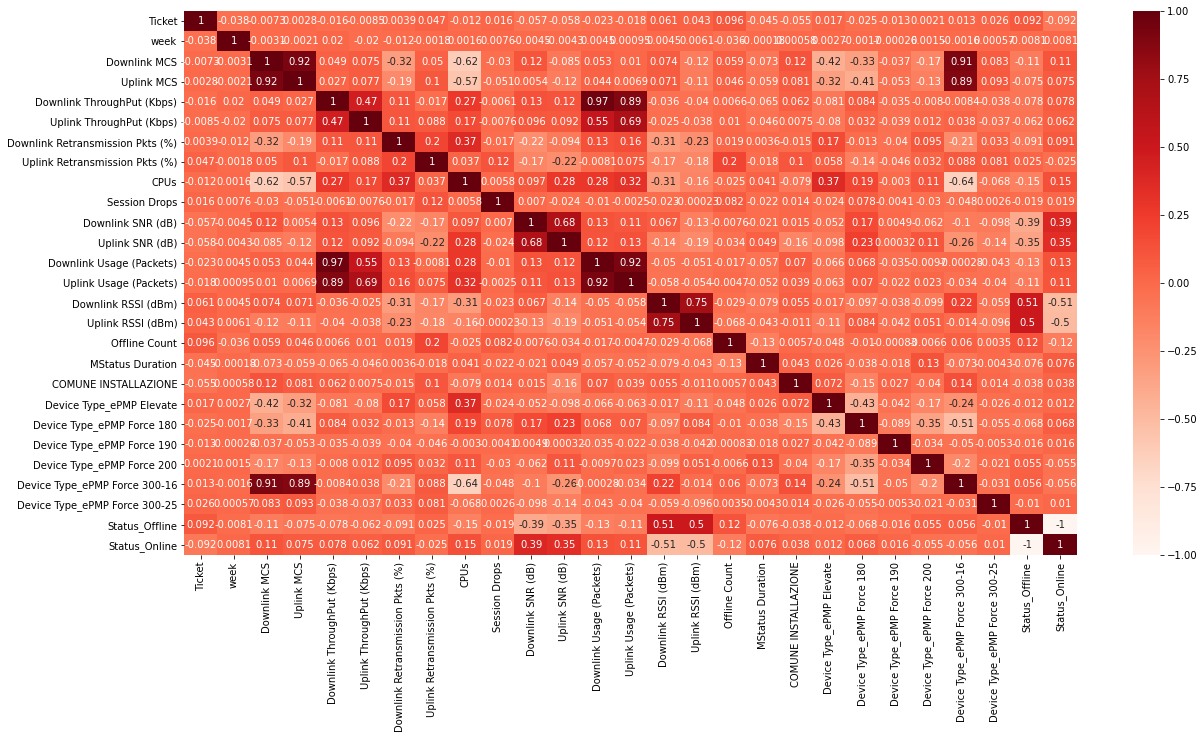

In [51]:
import seaborn as sns  
cor = XY_data_ctc.corr(method='pearson')
plt.figure(figsize = (20,10))
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds)

plt.show ()

In [52]:
#Correlazione con la variabile di output 
cor = XY_data_ctc.corr(method='pearson')
cor_target = abs(cor["Ticket"])

#Selecting caratteristiche correlati 
relevant_features = cor_target[cor_target>0.01]
print(relevant_features.sort_values(ascending = False))
#X_data_cambium.sort_values(by=['Polling Timestamp'], ascending = 1, inplace = True)

Ticket                            1.000000
Offline Count                     0.096238
Status_Offline                    0.092073
Status_Online                     0.092073
Downlink RSSI (dBm)               0.061395
Uplink SNR (dB)                   0.057554
Downlink SNR (dB)                 0.056991
COMUNE INSTALLAZIONE              0.054770
Uplink Retransmission Pkts (%)    0.046754
MStatus Duration                  0.044660
Uplink RSSI (dBm)                 0.043388
week                              0.037898
Device Type_ePMP Force 300-25     0.026227
Device Type_ePMP Force 180        0.025403
Downlink Usage (Packets)          0.023482
Uplink Usage (Packets)            0.017724
Device Type_ePMP Elevate          0.016718
Downlink ThroughPut (Kbps)        0.016281
Session Drops                     0.015636
Device Type_ePMP Force 300-16     0.012959
Device Type_ePMP Force 190        0.012677
CPUs                              0.012043
Name: Ticket, dtype: float64


In [53]:
cor = XY_data_ctc.corr(method='pearson')
cor_target = cor["Ticket"]
relevant_features = cor_target[cor_target<-0.01]
print(relevant_features)

week                         -0.037898
Downlink ThroughPut (Kbps)   -0.016281
CPUs                         -0.012043
Downlink SNR (dB)            -0.056991
Uplink SNR (dB)              -0.057554
Downlink Usage (Packets)     -0.023482
Uplink Usage (Packets)       -0.017724
MStatus Duration             -0.044660
COMUNE INSTALLAZIONE         -0.054770
Device Type_ePMP Force 180   -0.025403
Device Type_ePMP Force 190   -0.012677
Status_Online                -0.092073
Name: Ticket, dtype: float64


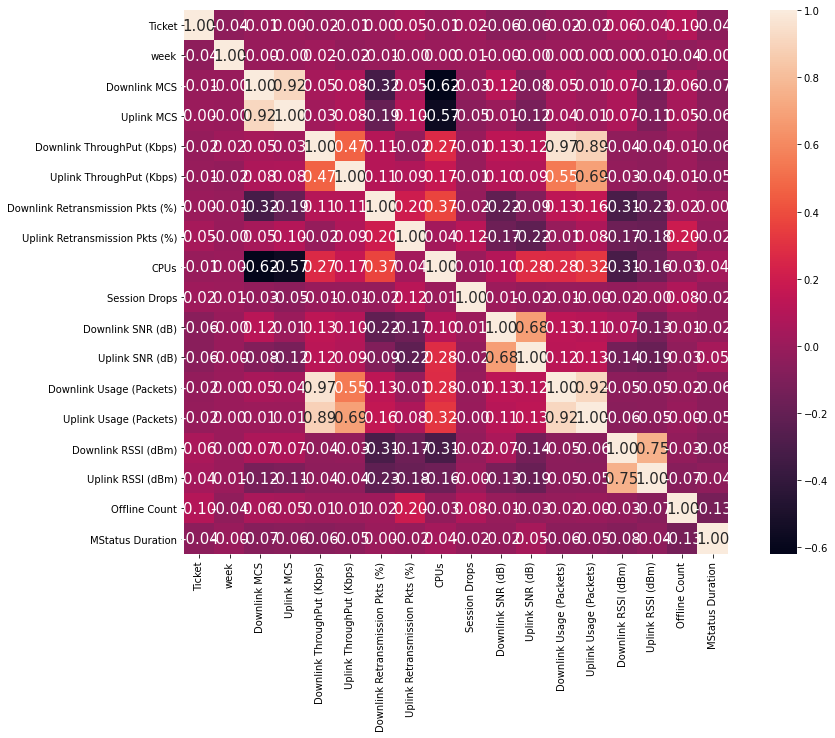

In [54]:
import numpy as np
cols = ['Ticket', 'week', 'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'MStatus Duration']
plt.figure(figsize = (15,10))
cm = np.corrcoef(XY_data_ctc[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [17]:
# Verifica Correlazione tra le variabili

print (XY_data_ctc [['Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
       'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)']].corr(method='pearson'))

                            Downlink MCS  Uplink MCS  \
Downlink MCS                    1.000000    0.916088   
Uplink MCS                      0.916088    1.000000   
Downlink ThroughPut (Kbps)      0.049277    0.026793   
Uplink ThroughPut (Kbps)        0.075411    0.076978   
Downlink SNR (dB)               0.115148    0.005352   
Uplink SNR (dB)                -0.084516   -0.120936   
Downlink Usage (Packets)        0.052796    0.043875   
Uplink Usage (Packets)          0.009959    0.006941   
Downlink RSSI (dBm)             0.073804    0.071256   
Uplink RSSI (dBm)              -0.121022   -0.106936   

                            Downlink ThroughPut (Kbps)  \
Downlink MCS                                  0.049277   
Uplink MCS                                    0.026793   
Downlink ThroughPut (Kbps)                    1.000000   
Uplink ThroughPut (Kbps)                      0.465486   
Downlink SNR (dB)                             0.133969   
Uplink SNR (dB)                    

In [ ]:
# da eliminare Uplink MCS,'Downlink Usage (Packets)','Uplink Usage (Packets)'

colX = ['Ticket', 'MAC', 'Device Name', 'Device Type', 
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','COD. CLIENTE','COMUNE INSTALLAZIONE','DIFFUSIONE']

dtypes = {'COMUNE INSTALLAZIONE':'str' }
XY_data_ctc_filter = pd.DataFrame(XY_data_ctc,columns=colX, dtype=dtypes) 


print(XY_data_ctc.info())
print(XY_data_ctc.shape)
print(XY_data_ctc)

# Dataset di addestramento e dataset di test

In [47]:
#Partizionamento dataset nei set addestramento e Test
print(XY_data_ctc.dtypes)
from sklearn.model_selection import train_test_split
X, y = XY_data_ctc.iloc[:, 1:].values, XY_data_ctc.iloc[:,:1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
print("Dataset di trainig: ",X_train.shape)

print("Dataset etichette: ",y_train.shape)
print("Dataset di test: ",X_test.shape)
print("Dataset di test per le etichette: ",y_test.shape)


Ticket                                          int64
week                                            int64
Downlink MCS                                    int64
Uplink MCS                                      int64
Downlink ThroughPut (Kbps)                    float64
Uplink ThroughPut (Kbps)                      float64
Downlink Retransmission Pkts (%)              float64
Uplink Retransmission Pkts (%)                float64
CPUs                                          float64
Session Drops                                   int64
Downlink SNR (dB)                               int64
Uplink SNR (dB)                                 int64
Downlink Usage (Packets)                        int64
Uplink Usage (Packets)                          int64
Downlink RSSI (dBm)                             int64
Uplink RSSI (dBm)                               int64
Offline Count                                   int64
MStatus Duration                                int64
MAC_00:04:56:20:66:90       

# Riduzione in scala e standardizzazione

In [48]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_std = stdsc.transform(X)

print("Dataset di training standardizzato: ",X_train_std)
print("Dataset di test standardizzato: ",X_test_std)

Dataset di training standardizzato:  [[-0.66606396  1.83780471  1.55157338 ... -0.13531215 -0.1675497
  -0.15691148]
 [-0.66606396 -0.24341848 -0.90504721 ... -0.13531215 -0.1675497
  -0.15691148]
 [-1.37110605 -0.24341848 -1.0074064  ... -0.13531215  5.96837821
  -0.15691148]
 ...
 [-1.37110605 -0.13935732 -1.0074064  ... -0.13531215 -0.1675497
  -0.15691148]
 [-0.66606396 -1.07590776 -1.0074064  ... -0.13531215 -0.1675497
  -0.15691148]
 [ 0.74402022 -0.55560196 -1.0074064  ... -0.13531215 -0.1675497
  -0.15691148]]
Dataset di test standardizzato:  [[-1.37110605 -0.55560196 -0.29089206 ... -0.13531215 -0.1675497
  -0.15691148]
 [-1.37110605 -0.24341848 -0.90504721 ... -0.13531215 -0.1675497
  -0.15691148]
 [ 0.03897813 -0.4515408  -0.29089206 ... -0.13531215 -0.1675497
  -0.15691148]
 ...
 [ 0.03897813 -0.24341848 -0.29089206 ... -0.13531215 -0.1675497
  -0.15691148]
 [-1.37110605 -0.24341848 -1.0074064  ... -0.13531215 -0.1675497
  -0.15691148]
 [-1.37110605  1.83780471  1.55157338 

# Selezione delle caratteristiche appropriate:

In [49]:
# Regolarizzazione

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, max_iter=500)

lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9728617039153084
Test accuracy: 0.9704037632301058


In [50]:
y_pred=lr.predict(X_test_std)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9704037632301058


In [51]:
# Probabilità su 1 campione del dataset di test
y_proba_pred_1 = lr.predict_proba(X_test_std[:1,:])
print('Il singolo campione di Test ha le seguenti probabilità :\n', y_proba_pred_1)
# Probabilità del nostro dataset di Test
y_proba_pred = lr.predict_proba(X_test_std)
print('Il metodo restituisce le probabilità di tutto il dataset di test:\n', y_proba_pred)

Il singolo campione di Test ha le seguenti probabilità :
 [[9.99957555e-01 4.24453900e-05]]
Il metodo restituisce le probabilità di tutto il dataset di test:
 [[9.99957555e-01 4.24453900e-05]
 [9.99981489e-01 1.85114256e-05]
 [9.77953761e-01 2.20462389e-02]
 ...
 [9.18014995e-01 8.19850048e-02]
 [9.99977973e-01 2.20270969e-05]
 [9.71462644e-01 2.85373560e-02]]


In [52]:
# Verifica predizione in dataset di test
y_pred = lr.predict(X_test_std)
print('Valori univoci in y_test:',set(y_test))
print('Valori univoci in y_pred:',set(y_pred))
print('Totali elementi y di Test:', y_test.size)
print('Totali elementi y Pred:',y_pred.size)
print('Quanti y = 1,y=0 in Test:',np.sum(y_test==1),np.sum(y_test==0))
print('Quanti y = 1,y=0 in Pred:',np.sum(y_pred==1),np.sum(y_pred==0))
print('Indice degli errori',np.where(y_test!=y_pred))
print('valore di y_test',y_test[np.where(y_test!=y_pred)])
print('valore di y pred',y_pred[np.where(y_test!=y_pred)])
print('valore di y_test!=y_pred',(y_test[np.where((y_test!=y_pred))]).size)
print('valore di y_test=y_pred',(y_test[np.where((y_test==y_pred))]).size)
print('valore di y_test=y_pred e y_test=1',(y_test[np.where((y_test==y_pred) & (y_test==1))]).size)
print('valore di y_test=y_pred e y_test=0',(y_test[np.where((y_test==y_pred) & (y_test==0))]).size)

y_proba_pred_1 = lr.predict_proba(X_test_std[27:28,:])
print(y_proba_pred_1)
y_proba_pred_2 = lr.predict_proba(X_test_std[1793:1795,:])
print(y_proba_pred_2)

Valori univoci in y_test: {0, 1}
Valori univoci in y_pred: {0, 1}
Totali elementi y di Test: 5102
Totali elementi y Pred: 5102
Quanti y = 1,y=0 in Test: 173 4929
Quanti y = 1,y=0 in Pred: 38 5064
Indice degli errori (array([   6,   86,   88,  143,  303,  372,  416,  483,  486,  565,  597,
        694,  725,  735,  748,  756,  767,  792,  836,  868,  913,  926,
        966,  970,  987, 1068, 1113, 1133, 1145, 1165, 1170, 1182, 1191,
       1258, 1296, 1298, 1312, 1367, 1388, 1398, 1422, 1435, 1498, 1506,
       1533, 1556, 1658, 1744, 1751, 1755, 1782, 1792, 1794, 1812, 1877,
       2021, 2029, 2031, 2056, 2065, 2084, 2093, 2134, 2141, 2193, 2269,
       2274, 2301, 2311, 2324, 2355, 2378, 2379, 2400, 2418, 2420, 2428,
       2440, 2511, 2558, 2576, 2581, 2601, 2679, 2718, 2768, 2775, 2849,
       2870, 2908, 2936, 2990, 3015, 3022, 3052, 3152, 3196, 3198, 3266,
       3278, 3279, 3281, 3314, 3324, 3372, 3376, 3393, 3394, 3426, 3431,
       3434, 3522, 3529, 3531, 3582, 3583, 3639, 3664

In [53]:
for i in range(0,len(X_test_std)):
    z = np.array([X_test_std[i]])
    y = lr.predict(z) 
    #print((i+1) ,X_test_std[i], y_test[i], y)
    if (y_test[i]!=y):
        print((i+1) ,X_test_std[i], y_test[i], y)

7 [ 0.03897813 -1.28403008 -0.90504721 ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
87 [ 1.44906231 -0.34747964 -1.0074064  ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
89 [-0.66606396 -0.34747964 -1.0074064  ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
144 [-1.37110605 -0.24341848 -1.0074064  ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
304 [ 1.44906231 -0.34747964 -0.29089206 ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
373 [-0.66606396  1.83780471  1.55157338 ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
417 [ 0.03897813 -1.28403008 -1.0074064  ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
484 [-1.37110605 -0.34747964 -0.90504721 ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
487 [ 0.74402022  1.94186587  2.16572853 ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
566 [ 0.74402022 -0.55560196 -0.39325125 ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
598 [ 0.03897813  1.83780471  1.65393258 ... -0.13531215 -0.1675497
 -0.15691148] 1 [0]
695 [ 0.74402022 -0.55560196  0.0161

In [54]:
# Regolarizzazione L1

from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')

lr1.fit(X_train_std, y_train)
print('Training accuracy:', lr1.score(X_train_std, y_train))
print('Test accuracy:', lr1.score(X_test_std, y_test))

Training accuracy: 0.9729457234078306
Test accuracy: 0.9700117600940807


In [55]:
# Probabilità su 1 campione del dataset di test
y_proba_pred_1 = lr1.predict_proba(X_test_std[:1,:])
print('Il singolo campione di Test ha le seguenti probabilità :\n', y_proba_pred_1)
# Probabilità del nostro dataset di Test
y_proba_pred = lr1.predict_proba(X_test_std)
print('Il metodo restituisce le probabilità di tutto il dataset di test:\n', y_proba_pred)

Il singolo campione di Test ha le seguenti probabilità :
 [[9.99227054e-01 7.72946052e-04]]
Il metodo restituisce le probabilità di tutto il dataset di test:
 [[9.99227054e-01 7.72946052e-04]
 [9.99756749e-01 2.43250692e-04]
 [9.78853815e-01 2.11461854e-02]
 ...
 [9.15961835e-01 8.40381652e-02]
 [9.99621298e-01 3.78702089e-04]
 [9.72985603e-01 2.70143973e-02]]


In [56]:
# Verifica predizione in dataset di test
y_pred = lr1.predict(X_test_std)
print('Valori univoci in y_test:',set(y_test))
print('Valori univoci in y_pred:',set(y_pred))
print('Totali elementi y di Test:', y_test.size)
print('Totali elementi y Pred:',y_pred.size)
print('Quanti y = 1,y=0 in Test:',np.sum(y_test==1),np.sum(y_test==0))
print('Quanti y = 1,y=0 in Pred:',np.sum(y_pred==1),np.sum(y_pred==0))
print('Indice degli errori',np.where(y_test!=y_pred))
print('valore di y_test',y_test[np.where(y_test!=y_pred)])
print('valore di y pred',y_pred[np.where(y_test!=y_pred)])
print('valore di y_test=y_pred',y_test[np.where((y_test==y_pred) & (y_test==1))])
print('valore di y_test!=y_pred',(y_test[np.where((y_test!=y_pred))]).size)
print('valore di y_test=y_pred',(y_test[np.where((y_test==y_pred))]).size)
print('valore di y_test=y_pred e y_test=1',(y_test[np.where((y_test==y_pred) & (y_test==1))]).size)
print('valore di y_test=y_pred e y_test=0',(y_test[np.where((y_test==y_pred) & (y_test==0))]).size)


Valori univoci in y_test: {0, 1}
Valori univoci in y_pred: {0, 1}
Totali elementi y di Test: 5102
Totali elementi y Pred: 5102
Quanti y = 1,y=0 in Test: 173 4929
Quanti y = 1,y=0 in Pred: 36 5066
Indice degli errori (array([   6,   86,   88,  143,  284,  303,  372,  416,  483,  486,  565,
        597,  694,  725,  735,  748,  756,  767,  792,  836,  868,  913,
        926,  966,  970,  987, 1068, 1113, 1133, 1145, 1165, 1170, 1182,
       1191, 1258, 1296, 1298, 1312, 1367, 1388, 1398, 1422, 1435, 1498,
       1506, 1533, 1556, 1658, 1744, 1751, 1755, 1782, 1792, 1794, 1812,
       1877, 2021, 2029, 2031, 2056, 2065, 2084, 2093, 2134, 2141, 2193,
       2269, 2274, 2301, 2311, 2324, 2355, 2378, 2379, 2400, 2418, 2420,
       2428, 2440, 2511, 2558, 2576, 2581, 2601, 2679, 2718, 2768, 2775,
       2849, 2870, 2908, 2936, 2990, 3015, 3022, 3052, 3152, 3196, 3198,
       3266, 3278, 3279, 3281, 3314, 3324, 3372, 3376, 3393, 3394, 3426,
       3431, 3434, 3522, 3529, 3531, 3582, 3583, 3639

In [57]:
# Regolarizzazione L2

from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
lr2.fit(X_train_std, y_train)
print('Training accuracy:', lr2.score(X_train_std, y_train))
print('Test accuracy:', lr2.score(X_test_std, y_test))

Training accuracy: 0.9729457234078306
Test accuracy: 0.9700117600940807


In [58]:
# Probabilità su 1 campione del dataset di test
y_proba_pred_1 = lr2.predict_proba(X_test_std[:1,:])
print('Il singolo campione di Test ha le seguenti probabilità :\n', y_proba_pred_1)
# Probabilità del nostro dataset di Test
y_proba_pred = lr2.predict_proba(X_test_std)
print('Il metodo restituisce le probabilità di tutto il dataset di test:\n', y_proba_pred)

Il singolo campione di Test ha le seguenti probabilità :
 [[9.99639948e-01 3.60051723e-04]]
Il metodo restituisce le probabilità di tutto il dataset di test:
 [[9.99639948e-01 3.60051723e-04]
 [9.99750515e-01 2.49484812e-04]
 [9.77345984e-01 2.26540161e-02]
 ...
 [9.17135945e-01 8.28640550e-02]
 [9.99792427e-01 2.07572992e-04]
 [9.71108949e-01 2.88910513e-02]]


In [59]:
# Verifica predizione in dataset di test
y_pred = lr2.predict(X_test_std)
print('Valori univoci in y_test:',set(y_test))
print('Valori univoci in y_pred:',set(y_pred))
print('Totali elementi y di Test:', y_test.size)
print('Totali elementi y Pred:',y_pred.size)
print('Quanti y = 1,y=0 in Test:',np.sum(y_test==1),np.sum(y_test==0))
print('Quanti y = 1,y=0 in Pred:',np.sum(y_pred==1),np.sum(y_pred==0))
print('Indice degli errori',np.where(y_test!=y_pred))
print('valore di y_test',y_test[np.where(y_test!=y_pred)])
print('valore di y pred',y_pred[np.where(y_test!=y_pred)])
print('valore di y_test=y_pred',y_test[np.where((y_test==y_pred) & (y_test==1))])
print('valore di y_test!=y_pred',(y_test[np.where((y_test!=y_pred))]).size)
print('valore di y_test=y_pred',(y_test[np.where((y_test==y_pred))]).size)
print('valore di y_test=y_pred e y_test=1',(y_test[np.where((y_test==y_pred) & (y_test==1))]).size)
print('valore di y_test=y_pred e y_test=0',(y_test[np.where((y_test==y_pred) & (y_test==0))]).size)


Valori univoci in y_test: {0, 1}
Valori univoci in y_pred: {0, 1}
Totali elementi y di Test: 5102
Totali elementi y Pred: 5102
Quanti y = 1,y=0 in Test: 173 4929
Quanti y = 1,y=0 in Pred: 38 5064
Indice degli errori (array([   6,   86,   88,  143,  303,  372,  416,  483,  486,  565,  597,
        694,  725,  735,  748,  756,  767,  792,  836,  868,  913,  926,
        966,  970,  987, 1068, 1113, 1133, 1145, 1165, 1170, 1182, 1191,
       1258, 1296, 1298, 1312, 1367, 1388, 1398, 1422, 1435, 1498, 1506,
       1533, 1556, 1658, 1744, 1751, 1755, 1782, 1792, 1794, 1812, 1877,
       2021, 2029, 2031, 2056, 2065, 2084, 2093, 2134, 2141, 2193, 2269,
       2274, 2301, 2311, 2324, 2355, 2378, 2379, 2400, 2418, 2420, 2428,
       2440, 2493, 2511, 2558, 2576, 2581, 2601, 2679, 2718, 2768, 2775,
       2849, 2870, 2908, 2936, 2990, 3015, 3022, 3052, 3152, 3196, 3198,
       3266, 3278, 3279, 3281, 3314, 3324, 3372, 3376, 3393, 3394, 3426,
       3431, 3434, 3522, 3529, 3531, 3582, 3583, 3639

# Random Forest

In [47]:
#Partizionamento dataset nei set addestramento e Test
print(XY_data_ctc.dtypes)
from sklearn.model_selection import train_test_split
X, y = XY_data_ctc.iloc[:, 1:].values, XY_data_ctc.iloc[:,:1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print("Dataset di trainig: ",X_train.shape)

print("Dataset etichette: ",y_train.shape)
print("Dataset di test: ",X_test.shape)
print("Dataset di test per le etichette: ",y_test.shape)

Ticket                                          int64
week                                            int64
Downlink MCS                                    int64
Uplink MCS                                      int64
Downlink ThroughPut (Kbps)                    float64
Uplink ThroughPut (Kbps)                      float64
Downlink Retransmission Pkts (%)              float64
Uplink Retransmission Pkts (%)                float64
CPUs                                          float64
Session Drops                                   int64
Downlink SNR (dB)                               int64
Uplink SNR (dB)                                 int64
Downlink Usage (Packets)                        int64
Uplink Usage (Packets)                          int64
Downlink RSSI (dBm)                             int64
Uplink RSSI (dBm)                               int64
Offline Count                                   int64
MStatus Duration                                int64
MAC_00:04:56:20:66:90       

In [48]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
#std
#clf.fit(X_train_std,y_train)



RandomForestClassifier(random_state=0)

In [49]:
y_pred=clf.predict(X_test)
#std
#y_pred=clf.predict(X_test_std)


In [50]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9749117992943943


In [51]:
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9749117992943943


In [52]:
# Verifica predizione in dataset di test
y_pred = clf.predict(X_test)
#std
#y_pred = clf.predict(X_test_std)
print('Valori univoci in y_test:',set(y_test))
print('Valori univoci in y_pred:',set(y_pred))
print('Totali elementi y di Test:', y_test.size)
print('Totali elementi y Pred:',y_pred.size)
print('Quanti y = 1,y=0 in Test:',np.sum(y_test==1),np.sum(y_test==0))
print('Quanti y = 1,y=0 in Pred:',np.sum(y_pred==1),np.sum(y_pred==0))
print('Indice degli errori',np.where(y_test!=y_pred))
print('valore di y_test',y_test[np.where(y_test!=y_pred)])
print('valore di y pred',y_pred[np.where(y_test!=y_pred)])
print('valore di y_test=y_pred',y_test[np.where((y_test==y_pred) & (y_test==1))])

print('valore di y_test!=y_pred',(y_test[np.where((y_test!=y_pred))]).size)
print('valore di y_test=y_pred',(y_test[np.where((y_test==y_pred))]).size)
print('valore di y_test=y_pred e y_test=1',(y_test[np.where((y_test==y_pred) & (y_test==1))]).size)
print('valore di y_test=y_pred e y_test=0',(y_test[np.where((y_test==y_pred) & (y_test==0))]).size)


Valori univoci in y_test: {0, 1}
Valori univoci in y_pred: {0, 1}
Totali elementi y di Test: 5102
Totali elementi y Pred: 5102
Quanti y = 1,y=0 in Test: 173 4929
Quanti y = 1,y=0 in Pred: 83 5019
Indice degli errori (array([   6,   86,   88,  143,  253,  284,  303,  372,  416,  483,  565,
        597,  694,  725,  735,  767,  868,  913,  970,  987, 1113, 1133,
       1165, 1170, 1182, 1191, 1198, 1296, 1298, 1312, 1367, 1435, 1498,
       1506, 1533, 1556, 1655, 1658, 1744, 1751, 1755, 1757, 1761, 1782,
       1792, 1794, 1812, 1877, 1971, 2021, 2031, 2056, 2065, 2084, 2093,
       2118, 2134, 2141, 2269, 2311, 2324, 2355, 2378, 2418, 2420, 2428,
       2440, 2511, 2558, 2576, 2601, 2775, 2843, 2849, 2854, 2908, 3022,
       3052, 3196, 3198, 3209, 3225, 3250, 3266, 3278, 3281, 3314, 3324,
       3372, 3376, 3393, 3416, 3417, 3426, 3434, 3522, 3529, 3531, 3583,
       3664, 3702, 3720, 3750, 3964, 3986, 4003, 4022, 4047, 4120, 4144,
       4169, 4224, 4286, 4336, 4392, 4430, 4622, 4643

In [53]:
for i in range(0,len(X_test)):
    z = np.array([X_test[i]])
    y = clf.predict(z) 
    #print((i+1) ,X_test_std[i], y_test[i], y)
    if (y_test[i]!=y):
        print((i+1) ,X_test[i], y_test[i], y)

7 [2. 4. 2. ... 0. 0. 0.] 1 [0]
87 [ 4. 13.  1. ...  0.  0.  0.] 1 [0]
89 [ 1. 13.  1. ...  0.  0.  0.] 1 [0]
144 [ 0. 14.  1. ...  0.  0.  0.] 1 [0]
254 [ 1. 32. 19. ...  0.  0.  0.] 0 [1]
285 [ 2. 12. 12. ...  0.  0.  0.] 1 [0]
304 [ 4. 13.  8. ...  0.  0.  0.] 1 [0]
373 [ 1. 34. 26. ...  0.  0.  0.] 1 [0]
417 [2. 4. 1. ... 0. 0. 0.] 1 [0]
484 [ 0. 13.  2. ...  0.  0.  0.] 1 [0]
566 [ 3. 11.  7. ...  0.  0.  0.] 1 [0]
598 [ 2. 34. 27. ...  0.  0.  0.] 1 [0]
695 [ 3. 11. 11. ...  0.  0.  0.] 0 [1]
726 [ 0. 13.  9. ...  0.  0.  0.] 1 [0]
736 [ 0. 34. 33. ...  0.  0.  0.] 1 [0]
768 [4. 6. 3. ... 0. 0. 0.] 1 [0]
869 [ 4. 14. 13. ...  0.  0.  0.] 1 [0]
914 [ 3. 13.  8. ...  0.  0.  0.] 1 [0]
971 [ 2. 34. 32. ...  0.  0.  0.] 1 [0]
988 [ 2. 15.  8. ...  0.  0.  0.] 1 [0]
1114 [ 1. 13. 11. ...  0.  0.  0.] 1 [0]
1134 [ 0. 32. 19. ...  0.  0.  0.] 1 [0]
1166 [2. 4. 1. ... 0. 0. 0.] 0 [1]
1171 [ 1. 10.  1. ...  0.  0.  0.] 1 [0]
1183 [ 1. 15.  1. ...  0.  0.  0.] 1 [0]
1192 [ 1. 34. 33. ...  

In [54]:
for i in range(0,len(X_test)):
    z = np.array([X_test[i]])
    y = clf.predict(z) 
    #print((i+1) ,X_test_std[i], y_test[i], y)
    if (y_test[i]==1):
        if (y_test[i]!=y):
            print((i+1) ,X_test[i], y_test[i], y)

7 [2. 4. 2. ... 0. 0. 0.] 1 [0]
87 [ 4. 13.  1. ...  0.  0.  0.] 1 [0]
89 [ 1. 13.  1. ...  0.  0.  0.] 1 [0]
144 [ 0. 14.  1. ...  0.  0.  0.] 1 [0]
285 [ 2. 12. 12. ...  0.  0.  0.] 1 [0]
304 [ 4. 13.  8. ...  0.  0.  0.] 1 [0]
373 [ 1. 34. 26. ...  0.  0.  0.] 1 [0]
417 [2. 4. 1. ... 0. 0. 0.] 1 [0]
484 [ 0. 13.  2. ...  0.  0.  0.] 1 [0]
566 [ 3. 11.  7. ...  0.  0.  0.] 1 [0]
598 [ 2. 34. 27. ...  0.  0.  0.] 1 [0]
726 [ 0. 13.  9. ...  0.  0.  0.] 1 [0]
736 [ 0. 34. 33. ...  0.  0.  0.] 1 [0]
768 [4. 6. 3. ... 0. 0. 0.] 1 [0]
869 [ 4. 14. 13. ...  0.  0.  0.] 1 [0]
914 [ 3. 13.  8. ...  0.  0.  0.] 1 [0]
971 [ 2. 34. 32. ...  0.  0.  0.] 1 [0]
988 [ 2. 15.  8. ...  0.  0.  0.] 1 [0]
1114 [ 1. 13. 11. ...  0.  0.  0.] 1 [0]
1134 [ 0. 32. 19. ...  0.  0.  0.] 1 [0]
1171 [ 1. 10.  1. ...  0.  0.  0.] 1 [0]
1183 [ 1. 15.  1. ...  0.  0.  0.] 1 [0]
1192 [ 1. 34. 33. ...  0.  0.  0.] 1 [0]
1297 [ 0. 11.  7. ...  0.  0.  0.] 1 [0]
1299 [ 3. 14.  8. ...  0.  0.  0.] 1 [0]
1313 [ 4. 34. 3

In [55]:
for i in range(0,len(X_test)):
    z = np.array([X_test[i]])
    y = clf.predict(z) 
    #print((i+1) ,X_test_std[i], y_test[i], y)
    if (y_test[i]==1):
        if (y_test[i]==y):
            print((i+1) ,X_test[i], y_test[i], y)

61 [ 5. 14.  1. ...  0.  0.  0.] 1 [1]
487 [ 3. 35. 32. ...  0.  0.  0.] 1 [1]
549 [6. 4. 1. ... 0. 0. 0.] 1 [1]
740 [ 4. 11.  8. ...  0.  0.  0.] 1 [1]
749 [ 4. 10.  8. ...  0.  0.  0.] 1 [1]
757 [ 1. 34. 27. ...  0.  0.  0.] 1 [1]
793 [ 4. 34. 27. ...  0.  0.  0.] 1 [1]
927 [ 5. 14.  1. ...  0.  0.  0.] 1 [1]
967 [6. 5. 2. ... 0. 0. 0.] 1 [1]
1069 [ 0. 34. 32. ...  0.  0.  0.] 1 [1]
1073 [ 6. 13. 11. ...  0.  0.  0.] 1 [1]
1146 [6. 3. 2. ... 0. 0. 0.] 1 [1]
1204 [6. 0. 0. ... 0. 0. 0.] 1 [1]
1259 [ 1. 12.  1. ...  0.  0.  0.] 1 [1]
1389 [5. 3. 2. ... 0. 0. 0.] 1 [1]
1399 [ 6. 11.  1. ...  0.  0.  0.] 1 [1]
1423 [ 3. 12.  6. ...  0.  0.  0.] 1 [1]
1512 [1. 0. 0. ... 0. 0. 0.] 1 [1]
1883 [1. 0. 0. ... 0. 0. 0.] 1 [1]
2016 [ 6. 34. 24. ...  0.  0.  0.] 1 [1]
2030 [ 0. 34. 32. ...  0.  0.  0.] 1 [1]
2104 [1. 0. 0. ... 0. 0. 0.] 1 [1]
2152 [0. 0. 0. ... 0. 0. 0.] 1 [1]
2194 [ 1. 14.  1. ...  0.  0.  0.] 1 [1]
2294 [ 6. 11.  3. ...  0.  0.  0.] 1 [1]
2302 [ 4. 13.  8. ...  0.  0.  0.] 1 [1

# Start here Anomization of personal data
 

# Attribute Suppression
 Delete the following personal data : MAC,Device Name,COD. CLIENTE,COMUNE INSTALLAZIONE

In [56]:
data = './XY_data_ctc.csv'
colX = ['Ticket', 'week', 'Device Type', 
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','DIFFUSIONE']

#dtypes = {'COMUNE INSTALLAZIONE':'str' }
#XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8', dtype=dtypes) 
XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8') 
XY_data_ctc = XY_data_ctc[colX]

print(XY_data_ctc.groupby('Ticket').size())
XY_data_ctc.loc[XY_data_ctc['Ticket']==2,['Ticket']]  = 1
print(XY_data_ctc.groupby('Ticket').size())

print(XY_data_ctc.info())
print(XY_data_ctc.shape)
#print(XY_data_ctc)

Ticket
0    16444
1      190
2      370
dtype: int64
Ticket
0    16444
1      560
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17004 entries, 0 to 17003
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticket                            17004 non-null  int64  
 1   week                              17004 non-null  int64  
 2   Device Type                       17004 non-null  object 
 3   Downlink MCS                      17004 non-null  object 
 4   Uplink MCS                        17004 non-null  object 
 5   Downlink ThroughPut (Kbps)        17004 non-null  float64
 6   Uplink ThroughPut (Kbps)          17004 non-null  float64
 7   Downlink Retransmission Pkts (%)  17004 non-null  float64
 8   Uplink Retransmission Pkts (%)    17004 non-null  float64
 9   CPUs                              17004 non-null  float64
 10  Session Drops                     1

# Gestione di dati Categorici : Mappaggio di caratteristiche Ordinali
    Downlink MCS, Uplink MCS

In [57]:
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].str.strip()
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].str.upper()
print ('Unique values Downlink MCS:\n', XY_data_ctc['Downlink MCS'].value_counts())
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].str.strip()
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].str.upper()
print ('Unique values Uplink MCS\n', XY_data_ctc['Uplink MCS'].value_counts())
print(XY_data_ctc.shape)

size_mapping = {
        'DS 9': 35,
        'DS 8': 34,
        'DS 7': 33,
        'DS 6': 32,
        'DS 5': 31,
        'DS 4': 30,
        'DS 3': 29,
        'DS 2': 28,
        'DS 1': 27,
        'DS 0': 26,
        'SS 9': 25,
        'SS 8': 24,
        'SS 7': 23,
        'SS 6': 22,
        'SS 5': 21,
        'SS 4': 20,
        'SS 3': 19,
        'SS 2': 18,
        'SS 1': 17,
        'SS 0': 16,
        '15': 15,
        '14': 14,
        '13': 13,
        '12': 12,
        '11': 11,
        '10': 10,
        '9': 9,
        '8': 8,
        '7': 7,
        '6': 6,
        '5': 5,
        '4': 4,
        '3': 3,
        '2': 2,
        '1': 1,
        '0': 0}
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].map(size_mapping)
print ('Unique values Downlink MCS:\n', XY_data_ctc['Downlink MCS'].value_counts())
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].map(size_mapping)
print ('Unique values Uplink MCS\n', XY_data_ctc['Uplink MCS'].value_counts())

Unique values Downlink MCS:
 14      2989
DS 8    2271
12      2246
13      2079
11      1488
15      1188
10       699
6        590
DS 7     504
4        396
DS 9     372
5        356
9        355
3        258
DS 6     246
8        229
DS 5     136
2        116
DS 4     109
0         97
7         92
DS 3      52
DS 0      32
SS 8      25
SS 9      25
1         17
DS 2      16
DS 1      12
SS 7       5
SS 4       2
SS 6       1
SS 5       1
Name: Downlink MCS, dtype: int64
Unique values Uplink MCS
 8       4234
1       3297
9       1066
2        909
DS 0     735
7        566
12       530
11       517
3        456
DS 2     378
DS 1     369
DS 7     348
SS 9     333
10       319
DS 3     306
6        301
14       297
DS 6     270
4        266
DS 5     233
SS 8     207
13       173
5        150
DS 4     144
0        114
DS 8      93
SS 7      92
SS 6      83
SS 1      81
SS 4      58
SS 3      46
SS 5      20
SS 2      13
Name: Uplink MCS, dtype: int64
(17004, 21)
Unique values Downlink M

# Gestione di dati Categorici : Nominale
 Codifica delle Caratteristiche nominali (One-Hot) in valori interi. 
 Device Type, Status, DIFFUSIONE


In [58]:

print ('Unique values Device Type:\n', XY_data_ctc['Device Type'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Device Type'])
print(XY_data_ctc.shape)

print ('Unique values Status:\n', XY_data_ctc['Status'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Status'])
print(XY_data_ctc.shape)

print ('Unique values DIFFUSIONE:\n', XY_data_ctc['DIFFUSIONE'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['DIFFUSIONE'])
print(XY_data_ctc.shape)

'''
print ('Unique values week:\n', XY_data_ctc['week'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['week'])
print(XY_data_ctc.shape)
'''

print(XY_data_ctc.info())

Unique values Device Type:
 ePMP Force 180       8120
ePMP Force 300-16    3786
ePMP Elevate         2904
ePMP Force 200       1988
ePMP Force 190        147
ePMP Force 300-25      59
Name: Device Type, dtype: int64
(17004, 26)
Unique values Status:
 Online     16606
Offline      398
Name: Status, dtype: int64
(17004, 27)
Unique values DIFFUSIONE:
 TCASAP4/3                     1537
TCASAP3/7                     1534
TCASAP3/1                     1158
CAMBIUM 1/1                   1142
TCASAP3/2                     1099
TCASAP1/3                      952
SPRISCO5                       913
TCASAP4/6                      811
BSU3                           810
TCASAP4/8                      736
CAMBIUM 3000 SUD               604
CASTAGNARO2                    586
TCASAP2/1                      495
VALLE DI MADDALONI CAMBIUM     492
ZONAIND_SUD                    441
ZONAIND_SUD2                   424
TCASAP4/7                      397
TEVECASA CAMBIUM               383
AVERSA7/2          

# Codifica delle etichette delle classi

In [59]:
print (XY_data_ctc['Ticket'].dtypes)
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
XY_data_ctc['Ticket'] = class_le.fit_transform(XY_data_ctc['Ticket'].values)
print (XY_data_ctc['Ticket'].dtypes)

int64
int64


In [60]:
logger.info("Saving Dataset...XY_data_ctc_Codifica_Suppression")
XY_data_ctc.to_csv('./XY_data_ctc_Codifica_Suppression.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc_Codifica_Suppressione


# Random Forest

In [61]:
#Partizionamento dataset nei set addestramento e Test
print(XY_data_ctc.dtypes)
from sklearn.model_selection import train_test_split
X, y = XY_data_ctc.iloc[:, 1:].values, XY_data_ctc.iloc[:,:1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print("Dataset di trainig: ",X_train.shape)

print("Dataset etichette: ",y_train.shape)
print("Dataset di test: ",X_test.shape)
print("Dataset di test per le etichette: ",y_test.shape)

Ticket                                     int64
week                                       int64
Downlink MCS                               int64
Uplink MCS                                 int64
Downlink ThroughPut (Kbps)               float64
Uplink ThroughPut (Kbps)                 float64
Downlink Retransmission Pkts (%)         float64
Uplink Retransmission Pkts (%)           float64
CPUs                                     float64
Session Drops                              int64
Downlink SNR (dB)                          int64
Uplink SNR (dB)                            int64
Downlink Usage (Packets)                   int64
Uplink Usage (Packets)                     int64
Downlink RSSI (dBm)                        int64
Uplink RSSI (dBm)                          int64
Offline Count                              int64
MStatus Duration                           int64
Device Type_ePMP Elevate                   uint8
Device Type_ePMP Force 180                 uint8
Device Type_ePMP For

In [62]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
#std
#clf.fit(X_train_std,y_train)



RandomForestClassifier(random_state=0)

In [63]:
y_pred=clf.predict(X_test)
#std
#y_pred=clf.predict(X_test_std)


In [64]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9747157977263818


In [65]:
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9747157977263818


In [66]:
# Verifica predizione in dataset di test
y_pred = clf.predict(X_test)
#std
#y_pred = clf.predict(X_test_std)
print('Valori univoci in y_test:',set(y_test))
print('Valori univoci in y_pred:',set(y_pred))
print('Totali elementi y di Test:', y_test.size)
print('Totali elementi y Pred:',y_pred.size)
print('Quanti y = 1,y=0 in Test:',np.sum(y_test==1),np.sum(y_test==0))
print('Quanti y = 1,y=0 in Pred:',np.sum(y_pred==1),np.sum(y_pred==0))
print('Indice degli errori',np.where(y_test!=y_pred))
print('valore di y_test',y_test[np.where(y_test!=y_pred)])
print('valore di y pred',y_pred[np.where(y_test!=y_pred)])
print('valore di y_test=y_pred',y_test[np.where((y_test==y_pred) & (y_test==1))])

print('valore di y_test!=y_pred',(y_test[np.where((y_test!=y_pred))]).size)
print('valore di y_test=y_pred',(y_test[np.where((y_test==y_pred))]).size)
print('valore di y_test=y_pred e y_test=1',(y_test[np.where((y_test==y_pred) & (y_test==1))]).size)
print('valore di y_test=y_pred e y_test=0',(y_test[np.where((y_test==y_pred) & (y_test==0))]).size)

Valori univoci in y_test: {0, 1}
Valori univoci in y_pred: {0, 1}
Totali elementi y di Test: 5102
Totali elementi y Pred: 5102
Quanti y = 1,y=0 in Test: 173 4929
Quanti y = 1,y=0 in Pred: 66 5036
Indice degli errori (array([   6,   86,   88,  143,  284,  303,  372,  416,  483,  486,  565,
        597,  725,  735,  767,  868,  913,  970,  987, 1113, 1133, 1165,
       1170, 1182, 1191, 1198, 1258, 1296, 1298, 1312, 1367, 1435, 1498,
       1506, 1533, 1556, 1658, 1744, 1751, 1755, 1792, 1794, 1812, 1877,
       2021, 2029, 2031, 2056, 2065, 2084, 2093, 2118, 2134, 2141, 2269,
       2311, 2324, 2355, 2378, 2379, 2418, 2420, 2428, 2440, 2511, 2558,
       2576, 2601, 2718, 2768, 2775, 2843, 2849, 2908, 3022, 3052, 3196,
       3198, 3225, 3250, 3266, 3278, 3279, 3281, 3314, 3324, 3372, 3376,
       3393, 3416, 3417, 3426, 3434, 3522, 3529, 3531, 3583, 3664, 3702,
       3720, 3750, 3964, 3986, 4003, 4022, 4030, 4047, 4120, 4144, 4169,
       4224, 4261, 4286, 4336, 4392, 4430, 4553, 4643

# Start here encryption
 MAC,Device Name,COD. CLIENTE,COMUNE INSTALLAZIONE

In [67]:
data = './XY_data_ctc.csv'
colX = ['Ticket', 'week', 'MAC', 'Device Name', 'Device Type', 
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','COD. CLIENTE','COMUNE INSTALLAZIONE','DIFFUSIONE']

dtypes = {'MAC':'str', 'Device Name':'str', 'COD. CLIENTE':'str', 'COMUNE INSTALLAZIONE':'str' }


XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8', dtype=dtypes) 
#XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8') 
XY_data_ctc = XY_data_ctc[colX]

print(XY_data_ctc.groupby('Ticket').size())
XY_data_ctc.loc[XY_data_ctc['Ticket']==2,['Ticket']]  = 1
print(XY_data_ctc.groupby('Ticket').size())

print(XY_data_ctc.info())
print(XY_data_ctc.shape)
#print(XY_data_ctc)

Ticket
0    16444
1      190
2      370
dtype: int64
Ticket
0    16444
1      560
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17004 entries, 0 to 17003
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticket                            17004 non-null  int64  
 1   week                              17004 non-null  int64  
 2   MAC                               17004 non-null  object 
 3   Device Name                       17004 non-null  object 
 4   Device Type                       17004 non-null  object 
 5   Downlink MCS                      17004 non-null  object 
 6   Uplink MCS                        17004 non-null  object 
 7   Downlink ThroughPut (Kbps)        17004 non-null  float64
 8   Uplink ThroughPut (Kbps)          17004 non-null  float64
 9   Downlink Retransmission Pkts (%)  17004 non-null  float64
 10  Uplink Retransmission Pkts (%)    1

In [68]:
'''
from cryptography.fernet import Fernet


# generate a key for encryptio and decryption
# You can use fernet to generate
# the key or use random key generator
# here I'm using fernet to generate key

key = Fernet.generate_key()

# Instance the Fernet class with the key

fernet = Fernet(key)

MACRIPTO = []
MACDERIPTO = []
for row in XY_data_ctc['MAC']:    
    temp = (str(row))
    print("original string: ", temp)
    encMessage = fernet.encrypt(temp.encode())
    print("encrypted string: ", encMessage)    
    MACRIPTO.append(encMessage)
    decMessage = fernet.decrypt(encMessage).decode()
    print("decrypted string: ", decMessage)
    MACDERIPTO.append(decMessage)
XY_data_ctc['MAC_CRIPTO'] = MACRIPTO
XY_data_ctc['MAC_DECRIPTO'] = MACDERIPTO
# elimina caratteristica origine
#X_data_cambium.drop(columns=['Status Duration'],inplace=True)
#print (X_data_cambium)

print(XY_data_ctc.info())
print(XY_data_ctc)
'''

'\nfrom cryptography.fernet import Fernet\n\n\n# generate a key for encryptio and decryption\n# You can use fernet to generate\n# the key or use random key generator\n# here I\'m using fernet to generate key\n\nkey = Fernet.generate_key()\n\n# Instance the Fernet class with the key\n\nfernet = Fernet(key)\n\nMACRIPTO = []\nMACDERIPTO = []\nfor row in XY_data_ctc[\'MAC\']:    \n    temp = (str(row))\n    print("original string: ", temp)\n    encMessage = fernet.encrypt(temp.encode())\n    print("encrypted string: ", encMessage)    \n    MACRIPTO.append(encMessage)\n    decMessage = fernet.decrypt(encMessage).decode()\n    print("decrypted string: ", decMessage)\n    MACDERIPTO.append(decMessage)\nXY_data_ctc[\'MAC_CRIPTO\'] = MACRIPTO\nXY_data_ctc[\'MAC_DECRIPTO\'] = MACDERIPTO\n# elimina caratteristica origine\n#X_data_cambium.drop(columns=[\'Status Duration\'],inplace=True)\n#print (X_data_cambium)\n\nprint(XY_data_ctc.info())\nprint(XY_data_ctc)\n'

In [69]:
'''
from cryptography.fernet import Fernet

# generate a key for encryptio and decryption
# You can use fernet to generate
# the key or use random key generator
# here I'm using fernet to generate key

key = Fernet.generate_key()

# Instance the Fernet class with the key

fernet = Fernet(key)

#MACRIPTO = []
#MACDERIPTO = []
#for row in XY_data_ctc['MAC']:
for row in np.unique(XY_data_ctc[['MAC']].values):    
    temp = (str(row))
    print("original string: ", temp)
    encMessage = fernet.encrypt(temp.encode())
    print("encrypted string: ", encMessage)
    XY_data_ctc.loc[XY_data_ctc['MAC']==temp ,['MAC_CRIPTO']]  = encMessage
    #MACRIPTO.append(encMessage)
    decMessage = fernet.decrypt(encMessage).decode()
    print("decrypted string: ", decMessage)
    #MACDERIPTO.append(decMessage)
    XY_data_ctc.loc[XY_data_ctc['MAC']==temp ,['MAC_DECRIPTO']]  = decMessage

    
#XY_data_ctc['MAC_CRIPTO'] = MACRIPTO
#XY_data_ctc['MAC_DECRIPTO'] = MACDERIPTO
# elimina caratteristica origine
#X_data_cambium.drop(columns=['Status Duration'],inplace=True)
#print (X_data_cambium)

print(XY_data_ctc.info())
print(XY_data_ctc)
'''

'\nfrom cryptography.fernet import Fernet\n\n# generate a key for encryptio and decryption\n# You can use fernet to generate\n# the key or use random key generator\n# here I\'m using fernet to generate key\n\nkey = Fernet.generate_key()\n\n# Instance the Fernet class with the key\n\nfernet = Fernet(key)\n\n#MACRIPTO = []\n#MACDERIPTO = []\n#for row in XY_data_ctc[\'MAC\']:\nfor row in np.unique(XY_data_ctc[[\'MAC\']].values):    \n    temp = (str(row))\n    print("original string: ", temp)\n    encMessage = fernet.encrypt(temp.encode())\n    print("encrypted string: ", encMessage)\n    XY_data_ctc.loc[XY_data_ctc[\'MAC\']==temp ,[\'MAC_CRIPTO\']]  = encMessage\n    #MACRIPTO.append(encMessage)\n    decMessage = fernet.decrypt(encMessage).decode()\n    print("decrypted string: ", decMessage)\n    #MACDERIPTO.append(decMessage)\n    XY_data_ctc.loc[XY_data_ctc[\'MAC\']==temp ,[\'MAC_DECRIPTO\']]  = decMessage\n\n    \n#XY_data_ctc[\'MAC_CRIPTO\'] = MACRIPTO\n#XY_data_ctc[\'MAC_DECRIPTO\'

In [70]:
logger.info("Saving Dataset...XY_data_ctc_encript")
XY_data_ctc.to_csv('./XY_data_ctc_encript.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc_encript


# Start Hash
MAC,Device Name,COD. CLIENTE,COMUNE INSTALLAZIONE

In [71]:
import hashlib


def encrypt_string(hash_string):
     sha_signature = \
         hashlib.sha256(hash_string.encode()).hexdigest()
     return sha_signature


MACRIPTO = []

for row in XY_data_ctc['MAC']:    
    temp = (str(row))
    #print("original string: ", temp)
    encMessage = encrypt_string(temp)
    #print("encrypted string: ", encMessage)    
    MACRIPTO.append(encMessage)
    
XY_data_ctc['MAC_CRIPTO_HASH'] = MACRIPTO

# elimina caratteristica origine
#XY_data_ctc.drop(columns=['MAC'],inplace=True)

DeviceNameCRIPTO = []

for row in XY_data_ctc['Device Name']:    
    temp = (str(row))
    #print("original string: ", temp)
    encMessage = encrypt_string(temp)
    #print("encrypted string: ", encMessage)    
    DeviceNameCRIPTO.append(encMessage)
    
XY_data_ctc['Device Name_HASH'] = DeviceNameCRIPTO

# elimina caratteristica origine
#XY_data_ctc.drop(columns=['Device Name'],inplace=True)

CODCLIENTECRIPTO = []

for row in XY_data_ctc['COD. CLIENTE']:    
    temp = (str(row))
    #print("original string: ", temp)
    encMessage = encrypt_string(temp)
    #print("encrypted string: ", encMessage)    
    CODCLIENTECRIPTO.append(encMessage)
    
XY_data_ctc['COD. CLIENTE_HASH'] = CODCLIENTECRIPTO

# elimina caratteristica origine
#XY_data_ctc.drop(columns=['COD. CLIENTE'],inplace=True)


COMUNEINSTALLAZIONECRIPTO = []

for row in XY_data_ctc['COMUNE INSTALLAZIONE']:    
    temp = (str(row))
    #print("original string: ", temp)
    encMessage = encrypt_string(temp)
    #print("encrypted string: ", encMessage)    
    COMUNEINSTALLAZIONECRIPTO.append(encMessage)
    
XY_data_ctc['COMUNE INSTALLAZIONE_HASH'] = COMUNEINSTALLAZIONECRIPTO

# elimina caratteristica origine
#XY_data_ctc.drop(columns=['COMUNE INSTALLAZIONE'],inplace=True)

print(XY_data_ctc.info())
#print(XY_data_ctc)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17004 entries, 0 to 17003
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticket                            17004 non-null  int64  
 1   week                              17004 non-null  int64  
 2   MAC                               17004 non-null  object 
 3   Device Name                       17004 non-null  object 
 4   Device Type                       17004 non-null  object 
 5   Downlink MCS                      17004 non-null  object 
 6   Uplink MCS                        17004 non-null  object 
 7   Downlink ThroughPut (Kbps)        17004 non-null  float64
 8   Uplink ThroughPut (Kbps)          17004 non-null  float64
 9   Downlink Retransmission Pkts (%)  17004 non-null  float64
 10  Uplink Retransmission Pkts (%)    17004 non-null  float64
 11  CPUs                              17004 non-null  float64
 12  Sess

In [72]:
logger.info("Saving Dataset...XY_data_ctc_hash")
XY_data_ctc.to_csv('./XY_data_ctc_hash.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc_hash


In [73]:
 #elimina caratteristica origine
XY_data_ctc.drop(columns=['MAC','Device Name','COD. CLIENTE','COMUNE INSTALLAZIONE'],inplace=True)

In [74]:
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].str.strip()
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].str.upper()
print ('Unique values Downlink MCS:\n', XY_data_ctc['Downlink MCS'].value_counts())
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].str.strip()
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].str.upper()
print ('Unique values Uplink MCS\n', XY_data_ctc['Uplink MCS'].value_counts())
print(XY_data_ctc.shape)

size_mapping = {
        'DS 9': 35,
        'DS 8': 34,
        'DS 7': 33,
        'DS 6': 32,
        'DS 5': 31,
        'DS 4': 30,
        'DS 3': 29,
        'DS 2': 28,
        'DS 1': 27,
        'DS 0': 26,
        'SS 9': 25,
        'SS 8': 24,
        'SS 7': 23,
        'SS 6': 22,
        'SS 5': 21,
        'SS 4': 20,
        'SS 3': 19,
        'SS 2': 18,
        'SS 1': 17,
        'SS 0': 16,
        '15': 15,
        '14': 14,
        '13': 13,
        '12': 12,
        '11': 11,
        '10': 10,
        '9': 9,
        '8': 8,
        '7': 7,
        '6': 6,
        '5': 5,
        '4': 4,
        '3': 3,
        '2': 2,
        '1': 1,
        '0': 0}
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].map(size_mapping)
print ('Unique values Downlink MCS:\n', XY_data_ctc['Downlink MCS'].value_counts())
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].map(size_mapping)
print ('Unique values Uplink MCS\n', XY_data_ctc['Uplink MCS'].value_counts())

Unique values Downlink MCS:
 14      2989
DS 8    2271
12      2246
13      2079
11      1488
15      1188
10       699
6        590
DS 7     504
4        396
DS 9     372
5        356
9        355
3        258
DS 6     246
8        229
DS 5     136
2        116
DS 4     109
0         97
7         92
DS 3      52
DS 0      32
SS 8      25
SS 9      25
1         17
DS 2      16
DS 1      12
SS 7       5
SS 4       2
SS 6       1
SS 5       1
Name: Downlink MCS, dtype: int64
Unique values Uplink MCS
 8       4234
1       3297
9       1066
2        909
DS 0     735
7        566
12       530
11       517
3        456
DS 2     378
DS 1     369
DS 7     348
SS 9     333
10       319
DS 3     306
6        301
14       297
DS 6     270
4        266
DS 5     233
SS 8     207
13       173
5        150
DS 4     144
0        114
DS 8      93
SS 7      92
SS 6      83
SS 1      81
SS 4      58
SS 3      46
SS 5      20
SS 2      13
Name: Uplink MCS, dtype: int64
(17004, 25)
Unique values Downlink M

In [75]:

print(XY_data_ctc.shape)
print ('Unique values MAC_CRIPTO_HASH:\n', XY_data_ctc ['MAC_CRIPTO_HASH'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['MAC_CRIPTO_HASH'])
print(XY_data_ctc.shape)


print ('Unique values Device Name_HASH:\n', XY_data_ctc ['Device Name_HASH'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Device Name_HASH'])
print(XY_data_ctc.shape)


print ('Unique values Device Type:\n', XY_data_ctc['Device Type'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Device Type'])
print(XY_data_ctc.shape)


print ('Unique values Status:\n', XY_data_ctc['Status'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Status'])
print(XY_data_ctc.shape)


print ('Valori univoci COD. CLIENTE_HASH:\n', XY_data_ctc['COD. CLIENTE_HASH'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['COD. CLIENTE_HASH'])
print(XY_data_ctc.shape)

print ('Unique values COMUNE INSTALLAZIONE_HASH:\n', XY_data_ctc['COMUNE INSTALLAZIONE_HASH'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['COMUNE INSTALLAZIONE_HASH'])
print(XY_data_ctc.shape)

print ('Unique values DIFFUSIONE:\n', XY_data_ctc['DIFFUSIONE'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['DIFFUSIONE'])
print(XY_data_ctc.shape)

'''
print ('Unique values week:\n', XY_data_ctc['week'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['week'])
print(XY_data_ctc.shape)
'''
print(XY_data_ctc.info())



(17004, 25)
Unique values MAC_CRIPTO_HASH:
 29e69057b7b6a328b44fed5713f8006bad213ce56e0052156282431e9b96afd1    57
698d5fea7b09631396ec04e0cae9d9600593362bb9f256dbec882e5a08c709fc    55
2d6dcd82fd9d74ee7cd6b8229566f1ebbe9caf1fcd78f724fc9711d94036238f    55
5ecdb796b28995cb312a332e3508a637caae9e13efad5aa156d5d19a835beb07    54
905b7b936a082e7f3cb60b821f94bd28ee3f0dabf0a584331ae3404b854fa89a    54
77896a68c2be369be3edf116da78bf9fe3a67eb2f1d693e6faf8cdb16c60760b    53
90ec991f71f34876617a11ee07db2e248b4a32a29154973b32d17804947b5aea    53
94e28808590624e074e5cbedf2374efec0efdc110e9ded8318778c08ee2b4c9b    53
fa7905274c882c518912d8d0e825ad2a9d1b32b3d832d2bedd21141673b64ea0    53
d965fcb1b24fb77d006ee1e140002b1d0e39b1a36d449e27a3a657c81ad63919    53
d64142b6b16d0a8c73c1ea8d0c6222fcbf05d719c688f38b682c7bbb3b748012    52
da7f06ecaa4934db0b31e1a961c32c98189422c4738eee60c05e4a096cdda294    52
1d5f8711e04b92e2be0be40c52fb04005db8a1890be49ecdda25e5b57e91eae0    52
1b5ce13f525acf9f72573ecf9d87bc0fc

In [77]:
print (XY_data_ctc['Ticket'].dtypes)
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
XY_data_ctc['Ticket'] = class_le.fit_transform(XY_data_ctc['Ticket'].values)
print (XY_data_ctc['Ticket'].dtypes)

int64
int64


In [78]:
logger.info("Saving Dataset...XY_data_ctc_hash_codifica")
XY_data_ctc.to_csv('./XY_data_ctc_hash_codifica.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc_hash_codifica


In [79]:
#Partizionamento dataset nei set addestramento e Test
print(XY_data_ctc.dtypes)
from sklearn.model_selection import train_test_split
X, y = XY_data_ctc.iloc[:, 1:].values, XY_data_ctc.iloc[:,:1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print("Dataset di trainig: ",X_train.shape)

print("Dataset etichette: ",y_train.shape)
print("Dataset di test: ",X_test.shape)
print("Dataset di test per le etichette: ",y_test.shape)

Ticket                                                                                          int64
week                                                                                            int64
Downlink MCS                                                                                    int64
Uplink MCS                                                                                      int64
Downlink ThroughPut (Kbps)                                                                    float64
Uplink ThroughPut (Kbps)                                                                      float64
Downlink Retransmission Pkts (%)                                                              float64
Uplink Retransmission Pkts (%)                                                                float64
CPUs                                                                                          float64
Session Drops                                                                     

In [80]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
#std
#clf.fit(X_train_std,y_train)



RandomForestClassifier(random_state=0)

In [81]:
y_pred=clf.predict(X_test)
#std
#y_pred=clf.predict(X_test_std)


In [82]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.975499803998432


In [83]:
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.975499803998432


In [84]:
# Verifica predizione in dataset di test
y_pred = clf.predict(X_test)
#std
#y_pred = clf.predict(X_test_std)
print('Valori univoci in y_test:',set(y_test))
print('Valori univoci in y_pred:',set(y_pred))
print('Totali elementi y di Test:', y_test.size)
print('Totali elementi y Pred:',y_pred.size)
print('Quanti y = 1,y=0 in Test:',np.sum(y_test==1),np.sum(y_test==0))
print('Quanti y = 1,y=0 in Pred:',np.sum(y_pred==1),np.sum(y_pred==0))
print('Indice degli errori',np.where(y_test!=y_pred))
print('valore di y_test',y_test[np.where(y_test!=y_pred)])
print('valore di y pred',y_pred[np.where(y_test!=y_pred)])
print('valore di y_test=y_pred',y_test[np.where((y_test==y_pred) & (y_test==1))])

print('valore di y_test!=y_pred',(y_test[np.where((y_test!=y_pred))]).size)
print('valore di y_test=y_pred',(y_test[np.where((y_test==y_pred))]).size)
print('valore di y_test=y_pred e y_test=1',(y_test[np.where((y_test==y_pred) & (y_test==1))]).size)
print('valore di y_test=y_pred e y_test=0',(y_test[np.where((y_test==y_pred) & (y_test==0))]).size)

Valori univoci in y_test: {0, 1}
Valori univoci in y_pred: {0, 1}
Totali elementi y di Test: 5102
Totali elementi y Pred: 5102
Quanti y = 1,y=0 in Test: 173 4929
Quanti y = 1,y=0 in Pred: 82 5020
Indice degli errori (array([   6,   86,   88,  143,  284,  303,  372,  416,  483,  565,  597,
        694,  725,  735,  767,  868,  913,  970,  987, 1113, 1133, 1165,
       1170, 1182, 1191, 1198, 1258, 1296, 1298, 1312, 1367, 1435, 1498,
       1506, 1507, 1533, 1556, 1655, 1658, 1744, 1751, 1755, 1757, 1761,
       1792, 1794, 1812, 1877, 1971, 2021, 2031, 2056, 2065, 2084, 2093,
       2118, 2134, 2141, 2269, 2311, 2324, 2355, 2378, 2418, 2420, 2428,
       2440, 2511, 2558, 2576, 2601, 2718, 2775, 2843, 2849, 2908, 3022,
       3052, 3196, 3225, 3250, 3266, 3278, 3281, 3314, 3324, 3372, 3376,
       3393, 3416, 3417, 3426, 3434, 3522, 3529, 3531, 3583, 3664, 3702,
       3720, 3750, 3964, 3986, 4003, 4022, 4033, 4047, 4120, 4144, 4169,
       4224, 4286, 4336, 4392, 4430, 4643, 4672, 4712

In [85]:
# save the model to disk
import joblib

filename = './RandomForestModelHash.sav'
joblib.dump(clf, filename)

['./RandomForestModelHash.sav']

In [86]:
logger.info("Predizione")
y_pred = clf.predict(X_test)
loaded_model = joblib.load(filename)
y_predLoad = loaded_model.predict(X_test)


INFO:LOGGER_NAME:Predizione


In [87]:
print(np.allclose(clf.predict(X_test), loaded_model.predict(X_test)))

True


# Start Character Masking
 MAC,Device Name,COD. CLIENTE,COMUNE INSTALLAZIONE

In [2]:
data = './XY_data_ctc.csv'
colX = ['Ticket', 'week', 'MAC', 'Device Name', 'Device Type', 
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','COD. CLIENTE','COMUNE INSTALLAZIONE','DIFFUSIONE']

dtypes = {'MAC':'str', 'Device Name':'str', 'COD. CLIENTE':'str', 'COMUNE INSTALLAZIONE':'str' }


XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8', dtype=dtypes) 
#XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8') 
XY_data_ctc = XY_data_ctc[colX]

print(XY_data_ctc.groupby('Ticket').size())
XY_data_ctc.loc[XY_data_ctc['Ticket']==2,['Ticket']]  = 1
print(XY_data_ctc.groupby('Ticket').size())

print(XY_data_ctc.info())
print(XY_data_ctc.shape)
#print(XY_data_ctc)

Ticket
0    16444
1      190
2      370
dtype: int64
Ticket
0    16444
1      560
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17004 entries, 0 to 17003
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticket                            17004 non-null  int64  
 1   week                              17004 non-null  int64  
 2   MAC                               17004 non-null  object 
 3   Device Name                       17004 non-null  object 
 4   Device Type                       17004 non-null  object 
 5   Downlink MCS                      17004 non-null  object 
 6   Uplink MCS                        17004 non-null  object 
 7   Downlink ThroughPut (Kbps)        17004 non-null  float64
 8   Uplink ThroughPut (Kbps)          17004 non-null  float64
 9   Downlink Retransmission Pkts (%)  17004 non-null  float64
 10  Uplink Retransmission Pkts (%)    1

In [3]:
#print(XY_data_ctc)

'''
#
substr=XY_data_ctc['MAC'].str[9:]
MACMASK =  []
for index,row in XY_data_ctc.iterrows():

    temp = XY_data_ctc.loc[index]['MAC'].replace(substr[index],'xx:xx:xx')
    #print(XY_data_ctc.loc[index]['MAC'])
    #print(substr[index])
    #print(temp)
    MACMASK.append(temp)
    
XY_data_ctc['MAC_MASK'] = MACMASK

print('Valori univoci in MAC_MASK:',set(XY_data_ctc['MAC_MASK']))
print(XY_data_ctc ['MAC_MASK'].value_counts())

#
substr=XY_data_ctc['COMUNE INSTALLAZIONE'].str[3:]
COMUNEINSTALLAZIONEMASK =  []

for index,row in XY_data_ctc.iterrows():   
    temp = XY_data_ctc.loc[index]['COMUNE INSTALLAZIONE'].replace(substr[index],'xx')
    COMUNEINSTALLAZIONEMASK.append(temp)   
    
XY_data_ctc['COMUNE INSTALLAZIONE_MASK'] = COMUNEINSTALLAZIONEMASK

print('Valori univoci in COMUNE INSTALLAZIONE_MASK:',set(XY_data_ctc['COMUNE INSTALLAZIONE_MASK']))
print(XY_data_ctc ['COMUNE INSTALLAZIONE_MASK'].value_counts())
#

'''
#
XY_data_ctc['MAC_MASK']=XY_data_ctc['MAC'].str[:-8]+'xx:xx:xx'
print('Valori univoci in MAC_MASK:',set(XY_data_ctc['MAC_MASK']))
print(XY_data_ctc ['MAC_MASK'].value_counts())
#

#
XY_data_ctc['Device Name_MASK']=XY_data_ctc['Device Name'].str[:-4]+'xxxx'
print('Valori univoci in Device Name_MASK:',set(XY_data_ctc['Device Name_MASK']))
print(XY_data_ctc ['Device Name_MASK'].value_counts())
#

#
XY_data_ctc['COD. CLIENTE_MASK'] = XY_data_ctc['COD. CLIENTE'].str[3:]
XY_data_ctc['COD. CLIENTE_MASK'] = XY_data_ctc['COD. CLIENTE_MASK'].str.zfill(4)
XY_data_ctc['COD. CLIENTE_MASK'] = XY_data_ctc['COD. CLIENTE_MASK'].str[:-2]+'xx'
print('Valori univoci in COD. CLIENTE_MASK:',set(XY_data_ctc['COD. CLIENTE_MASK']))
print(XY_data_ctc ['COD. CLIENTE_MASK'].value_counts())
#

#
XY_data_ctc['COMUNE INSTALLAZIONE_MASK']=XY_data_ctc['COMUNE INSTALLAZIONE'].str[:-2]+'xx'
print('Valori univoci in COMUNE INSTALLAZIONE_MASK:',set(XY_data_ctc['COMUNE INSTALLAZIONE_MASK']))
print(XY_data_ctc ['COMUNE INSTALLAZIONE_MASK'].value_counts())
#


#print(XY_data_ctc)

Valori univoci in MAC_MASK: {'E4:8D:8C:xx:xx:xx', '44:D9:E7:xx:xx:xx', '24:A4:3C:xx:xx:xx', '58:C1:7A:xx:xx:xx', '80:2A:A8:xx:xx:xx', 'DC:9F:DB:xx:xx:xx', '00:27:22:xx:xx:xx', '00:04:56:xx:xx:xx', '4C:5E:0C:xx:xx:xx'}
00:04:56:xx:xx:xx    10766
58:C1:7A:xx:xx:xx     3334
80:2A:A8:xx:xx:xx     1787
4C:5E:0C:xx:xx:xx      308
E4:8D:8C:xx:xx:xx      296
44:D9:E7:xx:xx:xx      245
24:A4:3C:xx:xx:xx      138
DC:9F:DB:xx:xx:xx       81
00:27:22:xx:xx:xx       49
Name: MAC_MASK, dtype: int64
Valori univoci in Device Name_MASK: {'ZARA NEMxxxx', 'CORVINO TExxxx', 'MERCURIO BEATxxxx', 'TATONE IMMACOxxxx', 'CAVALLO AMxxxx', 'VENOSA CIPRxxxx', 'ELISINO NIxxxx', 'DELLA GATTA GIUSxxxx', 'RICCARDI VINCxxxx', 'DIANA AGxxxx', 'IYOBHEBHE JOxxxx', 'SIMEONE VITTxxxx', 'DI RONZA SALVAxxxx', 'MORONESE GIOVxxxx', 'PETITO Mxxxx', 'MAISTO GIUSEPxxxx', 'MOTTOLA LUCxxxx', 'ERUEMULOR WIxxxx', 'BRUNZO GIOVxxxx', 'UCCIERO SALVAxxxx', 'AULITTO MASxxxx', 'DIANA GENxxxx', 'DI BERNARDO GIOVxxxx', 'GAROFALO VALENxxxx', 

In [4]:
logger.info("Saving Dataset...XY_data_ctc_MASK")
XY_data_ctc.to_csv('./XY_data_ctc_MASK.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc_MASK


In [5]:
# Elimina caratteristica origine
XY_data_ctc.drop(columns=['MAC','Device Name','COD. CLIENTE','COMUNE INSTALLAZIONE'],inplace=True)

In [6]:
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].str.strip()
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].str.upper()
print ('Unique values Downlink MCS:\n', XY_data_ctc['Downlink MCS'].value_counts())
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].str.strip()
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].str.upper()
print ('Unique values Uplink MCS\n', XY_data_ctc['Uplink MCS'].value_counts())
print(XY_data_ctc.shape)

size_mapping = {
        'DS 9': 35,
        'DS 8': 34,
        'DS 7': 33,
        'DS 6': 32,
        'DS 5': 31,
        'DS 4': 30,
        'DS 3': 29,
        'DS 2': 28,
        'DS 1': 27,
        'DS 0': 26,
        'SS 9': 25,
        'SS 8': 24,
        'SS 7': 23,
        'SS 6': 22,
        'SS 5': 21,
        'SS 4': 20,
        'SS 3': 19,
        'SS 2': 18,
        'SS 1': 17,
        'SS 0': 16,
        '15': 15,
        '14': 14,
        '13': 13,
        '12': 12,
        '11': 11,
        '10': 10,
        '9': 9,
        '8': 8,
        '7': 7,
        '6': 6,
        '5': 5,
        '4': 4,
        '3': 3,
        '2': 2,
        '1': 1,
        '0': 0}
XY_data_ctc['Downlink MCS'] = XY_data_ctc['Downlink MCS'].map(size_mapping)
print ('Unique values Downlink MCS:\n', XY_data_ctc['Downlink MCS'].value_counts())
XY_data_ctc['Uplink MCS'] = XY_data_ctc['Uplink MCS'].map(size_mapping)
print ('Unique values Uplink MCS\n', XY_data_ctc['Uplink MCS'].value_counts())

Unique values Downlink MCS:
 14      2989
DS 8    2271
12      2246
13      2079
11      1488
15      1188
10       699
6        590
DS 7     504
4        396
DS 9     372
5        356
9        355
3        258
DS 6     246
8        229
DS 5     136
2        116
DS 4     109
0         97
7         92
DS 3      52
DS 0      32
SS 9      25
SS 8      25
1         17
DS 2      16
DS 1      12
SS 7       5
SS 4       2
SS 6       1
SS 5       1
Name: Downlink MCS, dtype: int64
Unique values Uplink MCS
 8       4234
1       3297
9       1066
2        909
DS 0     735
7        566
12       530
11       517
3        456
DS 2     378
DS 1     369
DS 7     348
SS 9     333
10       319
DS 3     306
6        301
14       297
DS 6     270
4        266
DS 5     233
SS 8     207
13       173
5        150
DS 4     144
0        114
DS 8      93
SS 7      92
SS 6      83
SS 1      81
SS 4      58
SS 3      46
SS 5      20
SS 2      13
Name: Uplink MCS, dtype: int64
(17004, 25)
Unique values Downlink M

In [7]:

print(XY_data_ctc.shape)
print ('Unique values MAC_MASK:\n', XY_data_ctc ['MAC_MASK'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['MAC_MASK'])
print(XY_data_ctc.shape)

print ('Unique values COMUNE INSTALLAZIONE_MASK:\n', XY_data_ctc['COMUNE INSTALLAZIONE_MASK'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['COMUNE INSTALLAZIONE_MASK'])
print(XY_data_ctc.shape)

#
print ('Unique values Device Name_MASK:\n', XY_data_ctc ['Device Name_MASK'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Device Name_MASK'])
print(XY_data_ctc.shape)

print ('Unique values Device Type:\n', XY_data_ctc['Device Type'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Device Type'])
print(XY_data_ctc.shape)

print ('Unique values Status:\n', XY_data_ctc['Status'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['Status'])
print(XY_data_ctc.shape)

print ('Valori univoci COD. CLIENTE_MASK:\n', XY_data_ctc['COD. CLIENTE_MASK'].value_counts())
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['COD. CLIENTE_MASK'])
print(XY_data_ctc.shape)

print ('Unique values DIFFUSIONE:\n', XY_data_ctc['DIFFUSIONE'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['DIFFUSIONE'])
print(XY_data_ctc.shape)
#

'''
print ('Unique values week:\n', XY_data_ctc['week'].value_counts()) 
XY_data_ctc = pd.get_dummies(XY_data_ctc, columns = ['week'])
print(XY_data_ctc.shape)
'''
print(XY_data_ctc.info())



(17004, 25)
Unique values MAC_MASK:
 00:04:56:xx:xx:xx    10766
58:C1:7A:xx:xx:xx     3334
80:2A:A8:xx:xx:xx     1787
4C:5E:0C:xx:xx:xx      308
E4:8D:8C:xx:xx:xx      296
44:D9:E7:xx:xx:xx      245
24:A4:3C:xx:xx:xx      138
DC:9F:DB:xx:xx:xx       81
00:27:22:xx:xx:xx       49
Name: MAC_MASK, dtype: int64
(17004, 33)
Unique values COMUNE INSTALLAZIONE_MASK:
 810xx    15669
800xx     1187
811xx      148
Name: COMUNE INSTALLAZIONE_MASK, dtype: int64
(17004, 35)
Unique values Device Name_MASK:
 NOVIELLO LEONxxxx        100
DI FRATTA xxxx            98
DIANA RAFFAxxxx           61
BELLOPEDE ANxxxx          58
PETRECCA EDUxxxx          57
                        ... 
LUNAS SERVICExxxx          6
ZAGARIA RAFFxxxx           6
DE CRESCENZO DOMExxxx      6
MARTINELLI GERxxxx         6
CORVINO GIANxxxx           3
Name: Device Name_MASK, Length: 365, dtype: int64
(17004, 399)
Unique values Device Type:
 ePMP Force 180       8120
ePMP Force 300-16    3786
ePMP Elevate         2904
ePMP Force 20

In [8]:
print (XY_data_ctc['Ticket'].dtypes)
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
XY_data_ctc['Ticket'] = class_le.fit_transform(XY_data_ctc['Ticket'].values)
print (XY_data_ctc['Ticket'].dtypes)

int64
int64


In [9]:
logger.info("Saving Dataset...XY_data_ctc_Mask_codifica")
XY_data_ctc.to_csv('./XY_data_ctc_Mask_codifica.csv', encoding='utf-8')

INFO:LOGGER_NAME:Saving Dataset...XY_data_ctc_Mask_codifica


In [10]:
#Partizionamento dataset nei set addestramento e Test
print(XY_data_ctc.dtypes)
from sklearn.model_selection import train_test_split
X, y = XY_data_ctc.iloc[:, 1:].values, XY_data_ctc.iloc[:,:1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print("Dataset di trainig: ",X_train.shape)

print("Dataset etichette: ",y_train.shape)
print("Dataset di test: ",X_test.shape)
print("Dataset di test per le etichette: ",y_test.shape)

Ticket                                     int64
week                                       int64
Downlink MCS                               int64
Uplink MCS                                 int64
Downlink ThroughPut (Kbps)               float64
                                          ...   
DIFFUSIONE_TEVECASA CAMBIUM                uint8
DIFFUSIONE_VALLE DI MADDALONI CAMBIUM      uint8
DIFFUSIONE_ZONAIND_NORD                    uint8
DIFFUSIONE_ZONAIND_SUD                     uint8
DIFFUSIONE_ZONAIND_SUD2                    uint8
Length: 464, dtype: object
Dataset di trainig:  (11902, 463)
Dataset etichette:  (11902,)
Dataset di test:  (5102, 463)
Dataset di test per le etichette:  (5102,)


In [11]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
#std
#clf.fit(X_train_std,y_train)


RandomForestClassifier(random_state=0)

In [12]:
y_pred=clf.predict(X_test)
#std
#y_pred=clf.predict(X_test_std)


In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9743237945903567


In [14]:
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9743237945903567


In [15]:
# Verifica predizione in dataset di test
y_pred = clf.predict(X_test)
#std
#y_pred = clf.predict(X_test_std)
print('Valori univoci in y_test:',set(y_test))
print('Valori univoci in y_pred:',set(y_pred))
print('Totali elementi y di Test:', y_test.size)
print('Totali elementi y Pred:',y_pred.size)
print('Quanti y = 1,y=0 in Test:',np.sum(y_test==1),np.sum(y_test==0))
print('Quanti y = 1,y=0 in Pred:',np.sum(y_pred==1),np.sum(y_pred==0))
print('Indice degli errori',np.where(y_test!=y_pred))
print('valore di y_test',y_test[np.where(y_test!=y_pred)])
print('valore di y pred',y_pred[np.where(y_test!=y_pred)])
print('valore di y_test=y_pred',y_test[np.where((y_test==y_pred) & (y_test==1))])

print('valore di y_test!=y_pred',(y_test[np.where((y_test!=y_pred))]).size)
print('valore di y_test=y_pred',(y_test[np.where((y_test==y_pred))]).size)
print('valore di y_test=y_pred e y_test=1',(y_test[np.where((y_test==y_pred) & (y_test==1))]).size)
print('valore di y_test=y_pred e y_test=0',(y_test[np.where((y_test==y_pred) & (y_test==0))]).size)

Valori univoci in y_test: {0, 1}
Valori univoci in y_pred: {0, 1}
Totali elementi y di Test: 5102
Totali elementi y Pred: 5102
Quanti y = 1,y=0 in Test: 173 4929
Quanti y = 1,y=0 in Pred: 80 5022
Indice degli errori (array([   6,   86,   88,  143,  284,  303,  372,  416,  483,  486,  565,
        597,  694,  725,  735,  767,  868,  913,  970,  987, 1113, 1133,
       1165, 1170, 1182, 1191, 1198, 1258, 1296, 1298, 1312, 1367, 1435,
       1498, 1506, 1507, 1533, 1556, 1655, 1658, 1744, 1751, 1755, 1761,
       1792, 1794, 1812, 1877, 1971, 2021, 2029, 2031, 2056, 2065, 2084,
       2093, 2118, 2134, 2141, 2269, 2311, 2324, 2355, 2378, 2418, 2420,
       2428, 2440, 2511, 2558, 2576, 2601, 2775, 2843, 2849, 2908, 3022,
       3052, 3196, 3198, 3209, 3215, 3225, 3250, 3266, 3278, 3281, 3314,
       3324, 3372, 3376, 3393, 3416, 3417, 3426, 3434, 3522, 3529, 3531,
       3583, 3664, 3702, 3720, 3750, 3964, 3986, 4003, 4022, 4047, 4120,
       4144, 4169, 4224, 4261, 4286, 4336, 4392, 4430

# Start Generalisation
MAC,Device Name,COD. CLIENTE,COMUNE INSTALLAZIONE

In [25]:
data = './XY_data_ctc.csv'
colX = ['Ticket', 'week', 'MAC', 'Device Name', 'Device Type', 
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','COD. CLIENTE','COMUNE INSTALLAZIONE','DIFFUSIONE']

dtypes = {'MAC':'str', 'Device Name':'str', 'COD. CLIENTE':'str', 'COMUNE INSTALLAZIONE':'str' }


XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8', dtype=dtypes) 
#XY_data_ctc = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8') 
XY_data_ctc = XY_data_ctc[colX]

print(XY_data_ctc.groupby('Ticket').size())
XY_data_ctc.loc[XY_data_ctc['Ticket']==2,['Ticket']]  = 1
print(XY_data_ctc.groupby('Ticket').size())

print(XY_data_ctc.info())
print(XY_data_ctc.shape)
#print(XY_data_ctc)

Ticket
0    16444
1      190
2      370
dtype: int64
Ticket
0    16444
1      560
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17004 entries, 0 to 17003
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticket                            17004 non-null  int64  
 1   week                              17004 non-null  int64  
 2   MAC                               17004 non-null  object 
 3   Device Name                       17004 non-null  object 
 4   Device Type                       17004 non-null  object 
 5   Downlink MCS                      17004 non-null  object 
 6   Uplink MCS                        17004 non-null  object 
 7   Downlink ThroughPut (Kbps)        17004 non-null  float64
 8   Uplink ThroughPut (Kbps)          17004 non-null  float64
 9   Downlink Retransmission Pkts (%)  17004 non-null  float64
 10  Uplink Retransmission Pkts (%)    1

In [26]:
#
XY_data_ctc['MAC_GEN']=XY_data_ctc['MAC'].str[:-2]
print('Valori univoci in MAC_GEN:',set(XY_data_ctc['MAC_GEN']))
print(XY_data_ctc ['MAC_GEN'].value_counts())
#


#
XY_data_ctc['Device Name_GEN']=XY_data_ctc['Device Name'].str[:1]
print('Valori univoci in Device Name_GEN:',set(XY_data_ctc['Device Name_GEN']))
print(XY_data_ctc ['Device Name_GEN'].value_counts())
#


#
XY_data_ctc['COD. CLIENTE_GEN'] = XY_data_ctc['COD. CLIENTE'].str[3:]
XY_data_ctc['COD. CLIENTE_GEN'] = XY_data_ctc['COD. CLIENTE_GEN'].str.zfill(4)
#XY_data_ctc['COD. CLIENTE_GEN'] = XY_data_ctc['COD. CLIENTE_GEN'].str[:-2]+'xx'

#X_data_ticket_closed = X_data_ticket_closed[X_data_ticket_closed['DataTime Ticket Chiuso'] >= pd.to_datetime(X_data_cambium['Polling Timestamp'].values.min(),dayfirst = True, utc=True)]

#pd.to_numeric(XY_data_ctc.['COD. CLIENTE_GEN'] < 499 ,['COD. CLIENTE_GEN']]  = '0-499'

XY_data_ctc.loc[pd.to_numeric(XY_data_ctc['COD. CLIENTE_GEN']) < 499 ,['COD. CLIENTE_GEN']]  = '0-499'
print('Valori univoci in COD. CLIENTE_GEN:',set(XY_data_ctc['COD. CLIENTE_GEN']))
print(XY_data_ctc ['COD. CLIENTE_GEN'].value_counts())

'''
substr=XY_data_ctc['COMUNE INSTALLAZIONE'].str[3:]
COMUNEINSTALLAZIONEMASK =  []

for index,row in XY_data_ctc.iterrows():   
    temp = XY_data_ctc.loc[index]['COD. CLIENTE_GEN']
    XY_data_ctc.loc[XY_data_ctc['COD. CLIENTE_GEN'] < 499 ,['COD. CLIENTE_GEN']]  = '0-499'
    COMUNEINSTALLAZIONEMASK.append(temp)   
    
XY_data_ctc['COD. CLIENTE_GEN'] = COMUNEINSTALLAZIONEMASK


print('Valori univoci in COD. CLIENTE_GEN:',set(XY_data_ctc['COD. CLIENTE_GEN']))
print(XY_data_ctc ['COD. CLIENTE_GEN'].value_counts())
#
'''
#
XY_data_ctc['COMUNE INSTALLAZIONE_GEN']=XY_data_ctc['COMUNE INSTALLAZIONE'].str[:-2]
print('Valori univoci in COMUNE INSTALLAZIONE_GEN:',set(XY_data_ctc['COMUNE INSTALLAZIONE_GEN']))
print(XY_data_ctc ['COMUNE INSTALLAZIONE_GEN'].value_counts())
#


#print(XY_data_ctc)

Valori univoci in MAC_GEN: {'00:04:56:F2:57:', '00:04:56:F2:59:', '00:04:56:E1:CB:', '80:2A:A8:B3:39:', '00:04:56:20:66:', '58:C1:7A:45:4A:', '58:C1:7A:45:2F:', '58:C1:7A:4D:0B:', '00:04:56:F0:17:', '00:04:56:EA:A0:', '80:2A:A8:6B:08:', '80:2A:A8:6D:A1:', '80:2A:A8:E5:A9:', '80:2A:A8:6D:A3:', '58:C1:7A:45:3A:', '00:04:56:F1:7C:', '00:04:56:23:79:', '00:04:56:F4:F8:', '00:04:56:F2:3C:', '00:04:56:E4:4A:', '00:04:56:E4:3A:', '24:A4:3C:E5:65:', 'E4:8D:8C:47:BF:', '00:04:56:F4:F7:', '58:C1:7A:47:89:', '58:C1:7A:47:87:', '80:2A:A8:7F:5C:', '58:C1:7A:45:E8:', '44:D9:E7:57:7C:', '00:04:56:F1:7F:', '58:C1:7A:48:B3:', '00:04:56:F1:78:', '80:2A:A8:7F:4C:', '00:04:56:E0:5B:', '58:C1:7A:43:84:', '80:2A:A8:AF:7B:', '00:04:56:E4:56:', '00:04:56:F2:45:', '58:C1:7A:4D:1C:', '58:C1:7A:47:86:', '00:04:56:F4:38:', '00:04:56:E2:B0:', '00:04:56:E2:C1:', '00:04:56:F2:44:', '80:2A:A8:AF:7D:', '00:04:56:FF:B0:', '80:2A:A8:6D:A2:', '00:04:56:E4:3C:', '58:C1:7A:47:82:', '00:04:56:E0:85:', '58:C1:7A:45:C5:', '00

# Start Crea file .csv con dati univoci delle seguenti caratteristiche
 MAC,Device Name,COD. CLIENTE,COMUNE INSTALLAZIONE

In [66]:
data = './XY_data_ctc.csv'
colX = ['Ticket', 'week', 'MAC', 'Device Name', 'Device Type', 
        'Downlink MCS', 'Uplink MCS', 'Downlink ThroughPut (Kbps)', 'Uplink ThroughPut (Kbps)',
        'Downlink Retransmission Pkts (%)', 'Uplink Retransmission Pkts (%)', 'CPUs',
        'Session Drops', 'Downlink SNR (dB)', 'Uplink SNR (dB)', 'Downlink Usage (Packets)',
        'Uplink Usage (Packets)', 'Downlink RSSI (dBm)', 'Uplink RSSI (dBm)', 'Offline Count',
        'Status', 'MStatus Duration','COD. CLIENTE','COMUNE INSTALLAZIONE','DIFFUSIONE']

dtypes = {'MAC':'str', 'Device Name':'str', 'COD. CLIENTE':'str', 'COMUNE INSTALLAZIONE':'str' }


XY_data_ctc_unici = pd.read_csv(data, sep = ',', usecols= colX, encoding='utf-8', dtype=dtypes) 
XY_data_ctc_unici = XY_data_ctc_unici[colX]

print(XY_data_ctc_unici.groupby('Ticket').size())
XY_data_ctc_unici.loc[XY_data_ctc_unici['Ticket']==2,['Ticket']]  = 1
print(XY_data_ctc_unici.groupby('Ticket').size())

print(XY_data_ctc_unici.info())
print(XY_data_ctc_unici.shape)


Ticket
0    16444
1      190
2      370
dtype: int64
Ticket
0    16444
1      560
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17004 entries, 0 to 17003
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticket                            17004 non-null  int64  
 1   week                              17004 non-null  int64  
 2   MAC                               17004 non-null  object 
 3   Device Name                       17004 non-null  object 
 4   Device Type                       17004 non-null  object 
 5   Downlink MCS                      17004 non-null  object 
 6   Uplink MCS                        17004 non-null  object 
 7   Downlink ThroughPut (Kbps)        17004 non-null  float64
 8   Uplink ThroughPut (Kbps)          17004 non-null  float64
 9   Downlink Retransmission Pkts (%)  17004 non-null  float64
 10  Uplink Retransmission Pkts (%)    1

In [70]:
#print(XY_data_ctc_unici ['MAC'].value_counts())

# MAC
XY_data_ctc_UMAC = np.unique(XY_data_ctc_unici[['MAC']].values)
XY_data_ctc_UMAC = pd.Series(XY_data_ctc_UMAC)
print(XY_data_ctc_UMAC.shape)
XY_data_ctc_UMAC.to_csv('./XY_data_ctc_UMAC.csv', header=None, encoding='utf-8')

# Device Name
XY_data_ctc_UDeviceName = np.unique(XY_data_ctc_unici[['Device Name']].values)
XY_data_ctc_UDeviceName = pd.Series(XY_data_ctc_UDeviceName)
print(XY_data_ctc_UDeviceName.shape)
XY_data_ctc_UDeviceName.to_csv('./XY_data_ctc_UDeviceName.csv', header=None, encoding='utf-8')

# COD. CLIENTE
#print ('Unique values COD. CLIENTE:\n', XY_data_ctc ['COD. CLIENTE'].value_counts())
XY_data_ctc_UCODCLIENTE = np.unique(XY_data_ctc_unici[['COD. CLIENTE']].values)
XY_data_ctc_UCODCLIENTE = pd.Series(XY_data_ctc_UCODCLIENTE)
print(XY_data_ctc_UCODCLIENTE.shape)
XY_data_ctc_UCODCLIENTE.to_csv('./XY_data_ctc_UCODCLIENTE.csv', header=None, encoding='utf-8')

# COMUNE INSTALLAZIONE
#print ('Unique values COMUNE INSTALLAZIONE:\n', XY_data_ctc ['COMUNE INSTALLAZIONE'].value_counts())
XY_data_ctc_UCOMUNEINSTALLAZIONE = np.unique(XY_data_ctc_unici[['COMUNE INSTALLAZIONE']].values)
XY_data_ctc_UCOMUNEINSTALLAZIONE = pd.Series(XY_data_ctc_UCOMUNEINSTALLAZIONE)
print(XY_data_ctc_UCOMUNEINSTALLAZIONE.shape)
XY_data_ctc_UCOMUNEINSTALLAZIONE.to_csv('./XY_data_ctc_UCOMUNEINSTALLAZIONE.csv', header=None, encoding='utf-8')

(381,)
(366,)
Unique values COD. CLIENTE:
 Fly1290    100
Fly700      61
Fly516      58
Fly2029     57
Fly666      56
Fly1801     55
Fly460      55
Fly150      55
Fly662      54
Fly884      54
Fly162      54
Fly1990     53
Fly1753     53
Fly873      53
Fly1570     53
Fly1804     53
Fly891      53
Fly1936     53
Fly960      53
Fly141      52
Fly220      52
Fly760      52
Fly1654     52
Fly2022     52
Fly1923     52
Fly645      51
Fly1352     51
Fly1689     51
Fly1771     51
Fly1101     51
Fly1532     51
Fly966      51
Fly1481     51
Fly1377     51
Fly1541     51
Fly325      51
Fly581      51
Fly704      51
Fly1854     51
Fly616      50
Fly1835     50
Fly1847     50
Fly625      50
Fly1981     50
Fly212      50
Fly205      50
Fly1900     50
Fly1628     50
Fly1245     50
Fly1233     50
Fly1853     50
Fly1015     50
Fly1466     50
Fly1304     50
Fly1270     50
Fly1048     50
Fly1993     50
Fly1825     50
Fly1767     50
Fly1567     50
Fly1839     50
Fly1552     50
Fly1252     50
Fly687      

## Selezione modello predittivo
## scelta metrica prestazionale
## regolarizzazione

# Valutazione modello finale

# Predizione